Christian Colon

Question 1

(i)

In [1]:
da=read.table("m-umcsent.txt",header=TRUE)

In [2]:
da

year,mon,day,VALUE
1978,1,1,83.7
1978,2,1,84.3
1978,3,1,78.8
1978,4,1,81.6
1978,5,1,82.9
1978,6,1,80.0
1978,7,1,82.4
1978,8,1,78.4
1978,9,1,80.4
1978,10,1,79.3


In [3]:
da_ts = ts(da$VALUE,frequency=12,start=c(1978,1))

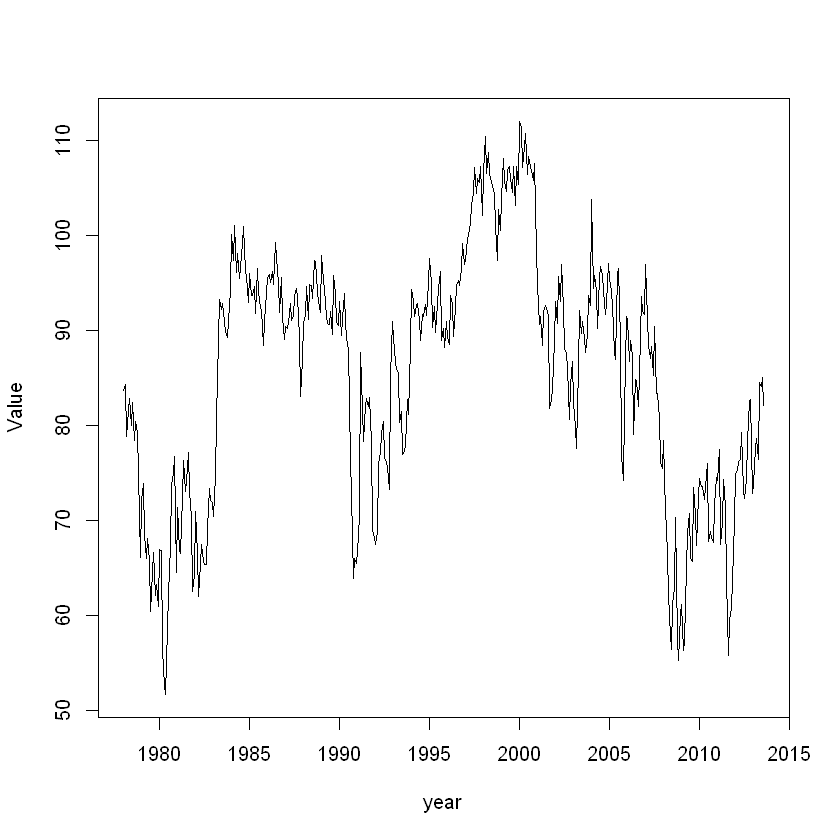

In [4]:
plot(da_ts,type='l',xlab='year',ylab='Value')

(ii)

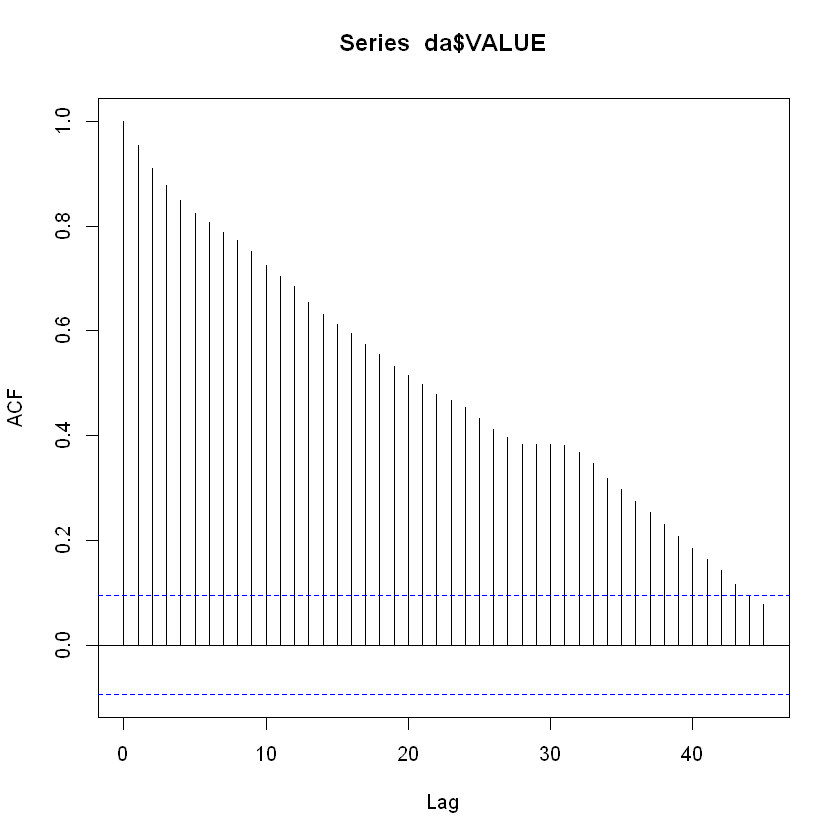

In [5]:
acf(da$VALUE,lag=45)

The ACFs of the series are high and decay slowly. So there is unit root in this series.

(iii)

In [6]:
firdiff = diff(da$VALUE)

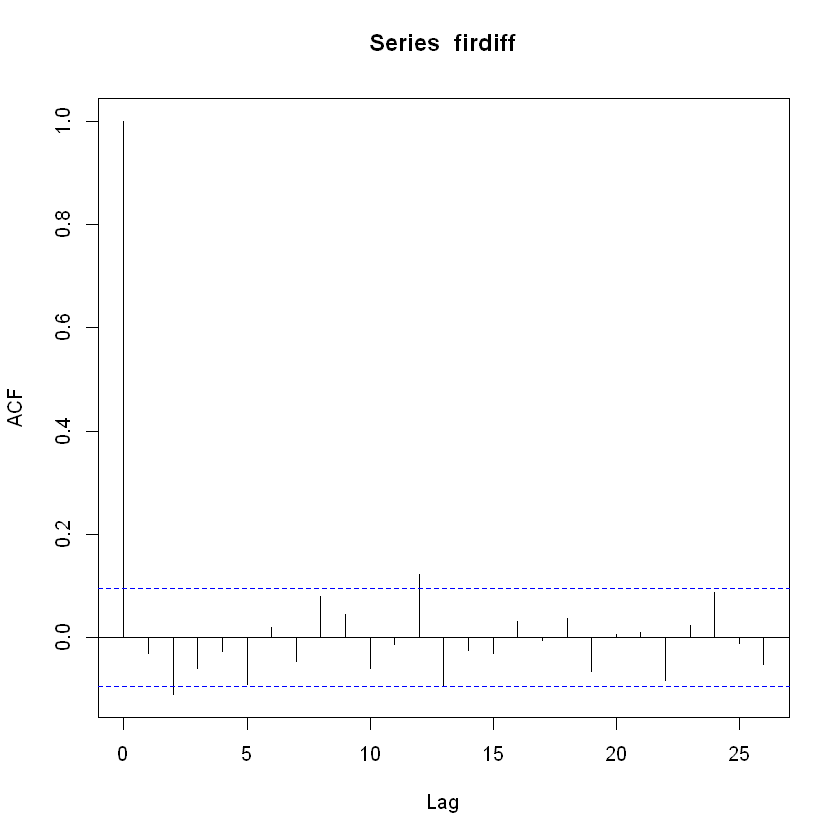

In [7]:
acf(firdiff)

Correlation looks less persistant.

In [8]:
t.test(firdiff)


	One Sample t-test

data:  firdiff
t = -0.019349, df = 426, p-value = 0.9846
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.3843808  0.3768867
sample estimates:
   mean of x 
-0.003747073 


From t-test we can conclude that mean is not statistically different from zero.

(iv)

In [9]:
Box.test(firdiff,lag=12,type='Ljung')


	Box-Ljung test

data:  firdiff
X-squared = 24.111, df = 12, p-value = 0.01965


The p value is .01 which is less than .05. We reject the null hypothesis, there is serial correlation present.

(v)

In [10]:
firdiff.ar = ar(firdiff, na.action=na.omit, method = 'mle')

In [11]:
firdiff.ar$order

[1] 5

The AR model is order 5.

(vi)

AR coeffiecients

In [12]:
firdiff.ar$ar

[1] -0.04986309 -0.12661794 -0.08296787 -0.04982119 -0.11066502

All negative coeffiecents corresponding to the the negative ACF for the first 5 lags.

(vi)

In [13]:
m1 = arima(firdiff,order=c(5,0,0),include.mean = F);

In [14]:
m1


Call:
arima(x = firdiff, order = c(5, 0, 0), include.mean = F)

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.0499  -0.1266  -0.0830  -0.0498  -0.1107
s.e.   0.0481   0.0481   0.0483   0.0483   0.0483

sigma^2 estimated as 15.46:  log likelihood = -1190.59,  aic = 2393.17

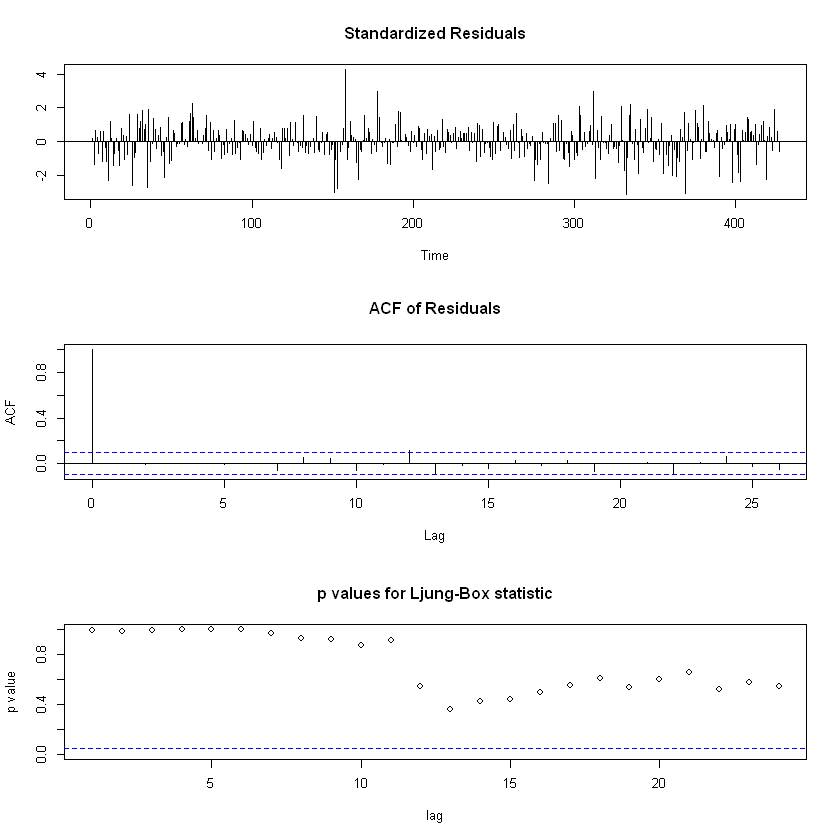

In [15]:
tsdiag(m1,gof=24)

The model explains much of the serial correlation. We do expect 5% of lags to be significant, so lag 12 being significant is not an issue.

(vi)

This model could imply business cycles. Model explained pattern in serial correlation

(viii)

In [16]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.3.3"

In [17]:
forecast(m1, h=4)

    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
428     -0.1038796 -5.143164 4.935405 -7.810800 7.603041
429     -0.5743992 -5.619948 4.471149 -8.290899 7.142101
430      0.2851835 -4.799001 5.369368 -7.490406 8.060773
431      0.1059215 -4.990650 5.202493 -7.688612 7.900455

1 period:-0.1038796 95% CI(-7.810800,7.603041)

2 period:-0.5743992 95% CI(-8.290899,7.142101)

3 period:0.2851835 95% CI(-7.490406,8.060773)

4 period:0.1059215 95% CI(-7.688612,7.900455) 


Question 2

(i)

Only the abs value of t-ratio for ar2 ,ar3,ar5 were greater than 1.2

In [18]:
m1.f = arima(firdiff,order=c(5,0,0), fixed= c(0,NA,NA,0,NA),include.mean = F)

Warning message in arima(firdiff, order = c(5, 0, 0), fixed = c(0, NA, NA, 0, NA), :
"some AR parameters were fixed: setting transform.pars = FALSE"

In [19]:
m1.f


Call:
arima(x = firdiff, order = c(5, 0, 0), include.mean = F, fixed = c(0, NA, NA, 
    0, NA))

Coefficients:
      ar1      ar2      ar3  ar4      ar5
        0  -0.1191  -0.0754    0  -0.1067
s.e.    0   0.0479   0.0480    0   0.0483

sigma^2 estimated as 15.54:  log likelihood = -1191.59,  aic = 2391.17

(ii)

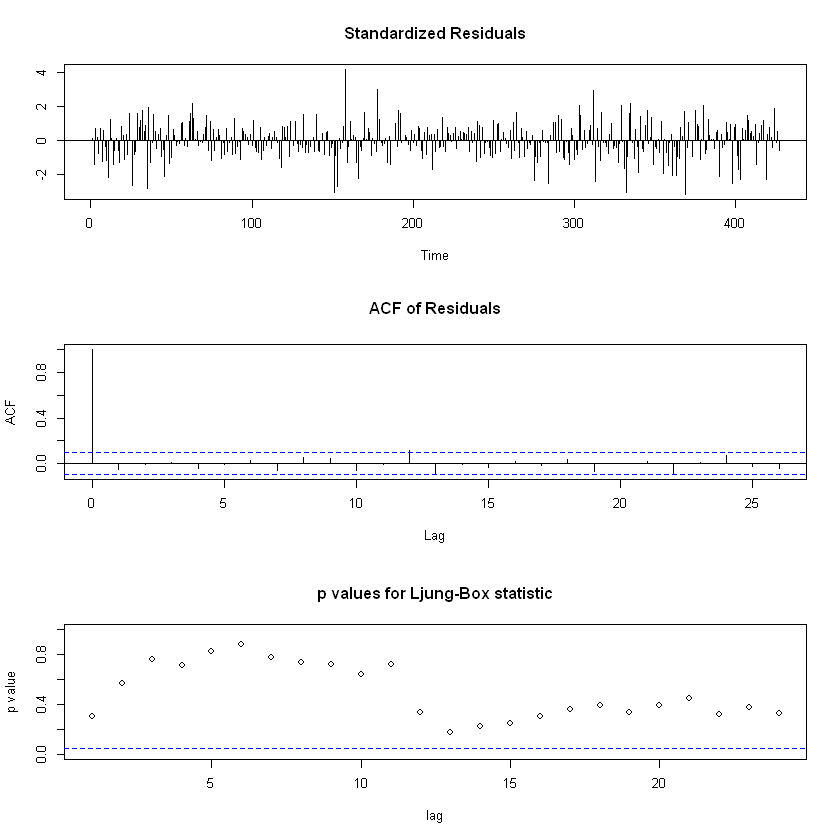

In [20]:
tsdiag(m1.f,gof=24)

Yes the same reasoning as for the original model also explains why this model is adequate. Much of the autocorrelation is explained.

(iii)

Comparing both by AIC shows that the fixed model(without a1 and a4) should be preferred, because its AIC is lower, likely due to its fewer parameters. 

(iv)

In [21]:
source("backtest.R")

In [22]:
m1.bt = backtest(m1,firdiff,380,1)

[1] "RMSE of out-of-sample forecasts"
[1] 4.002229
[1] "Mean absolute error of out-of-sample forecasts"
[1] 3.120026


In [23]:
m1.f.bt = backtest(m1.f,firdiff,380,1)

[1] "RMSE of out-of-sample forecasts"
[1] 4.002229
[1] "Mean absolute error of out-of-sample forecasts"
[1] 3.120026


Both have the same forecast error.

Question 3

(i)

In [24]:
d2 = read.table("m-unempmean.txt", header = TRUE)

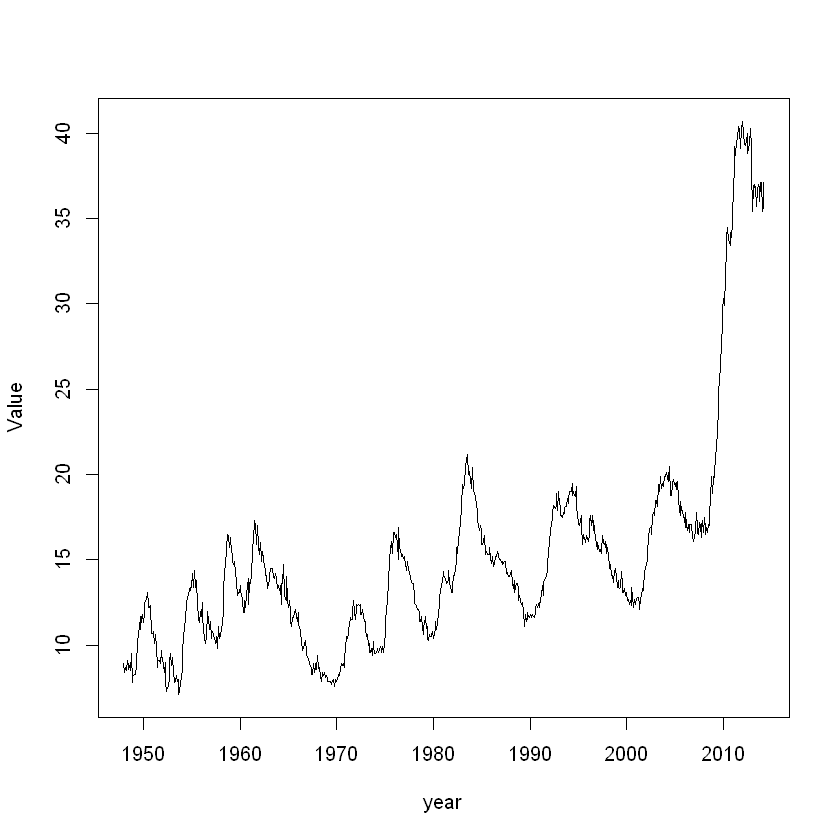

In [25]:
d2_ts = ts(d2$Value,frequency=12,start=c(1948,1))
plot(d2_ts,xlab='year',ylab='Value')

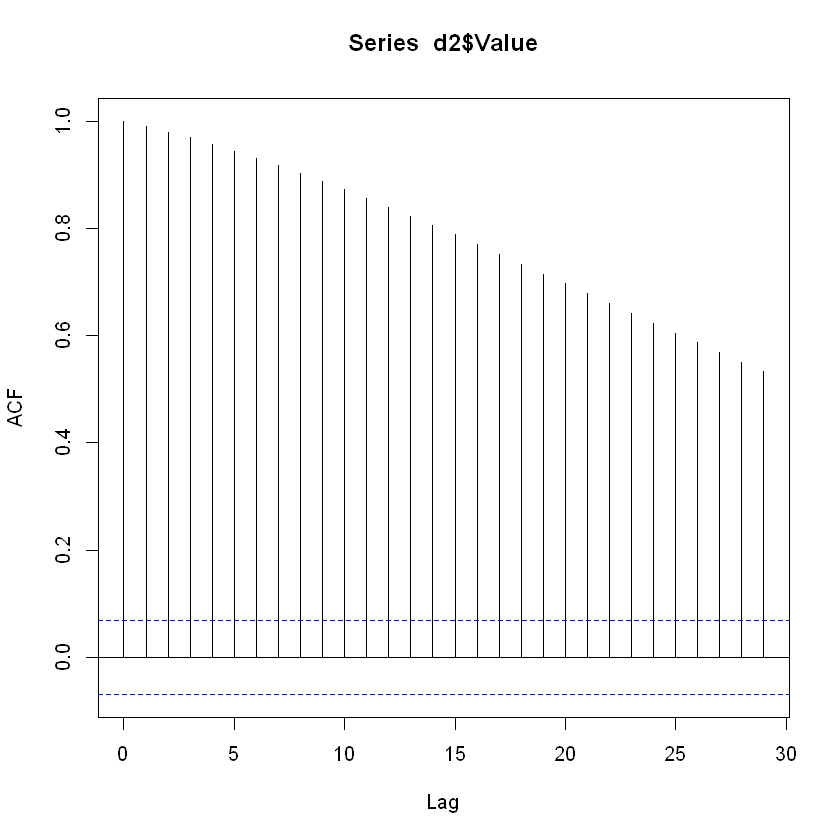

In [26]:
acf(d2$Value)

The ACFs of the series are high and decay slowly. So there is unit root in this series.

(ii)

In [27]:
rt = diff(d2$Value)

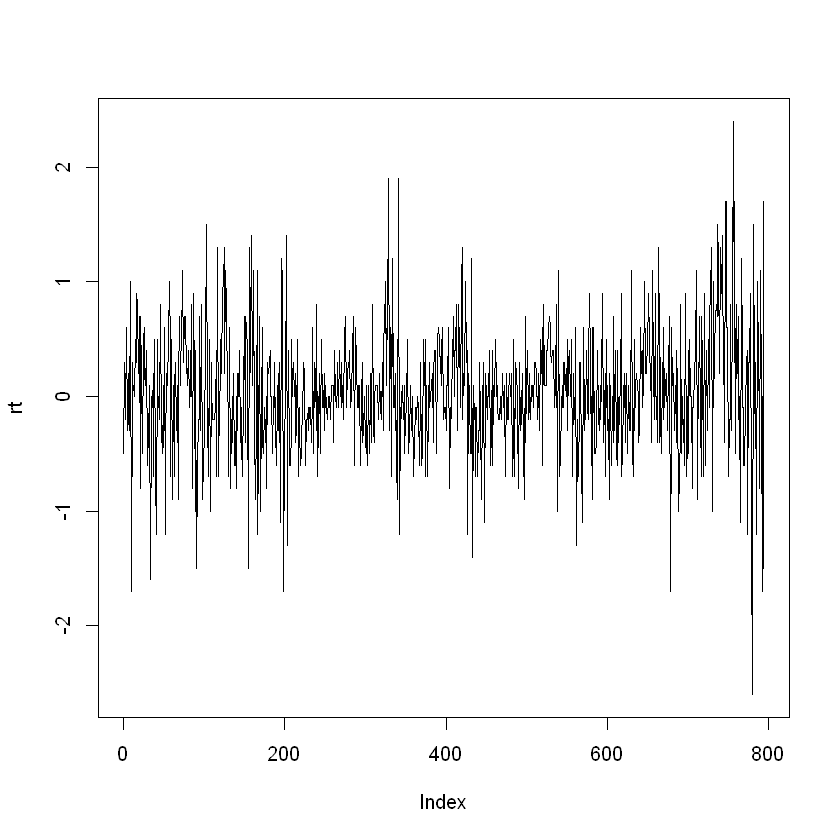

In [28]:
plot(rt,type = "l")

In [29]:
t.test(rt)


	One Sample t-test

data:  rt
t = 1.6507, df = 793, p-value = 0.0992
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006362152  0.073616560
sample estimates:
mean of x 
0.0336272 


Based on t-test, we fail to reject the null hypothesis. The mean is not statistically different from zero.

(iii)

In [30]:
rt.ar = ar(rt, na.action=na.omit, method = 'mle')

In [31]:
rt.ar$order
rt.ar$ar

[1] 12

[1] -0.13643254  0.11242309  0.10705341  0.11547114  0.07289050  0.07555864
 [7]  0.08941205 -0.06178823  0.06814787  0.06045106  0.02052957 -0.07311386

In [32]:
m3 = arima(rt,order=c(12,0,0),include.mean = F)

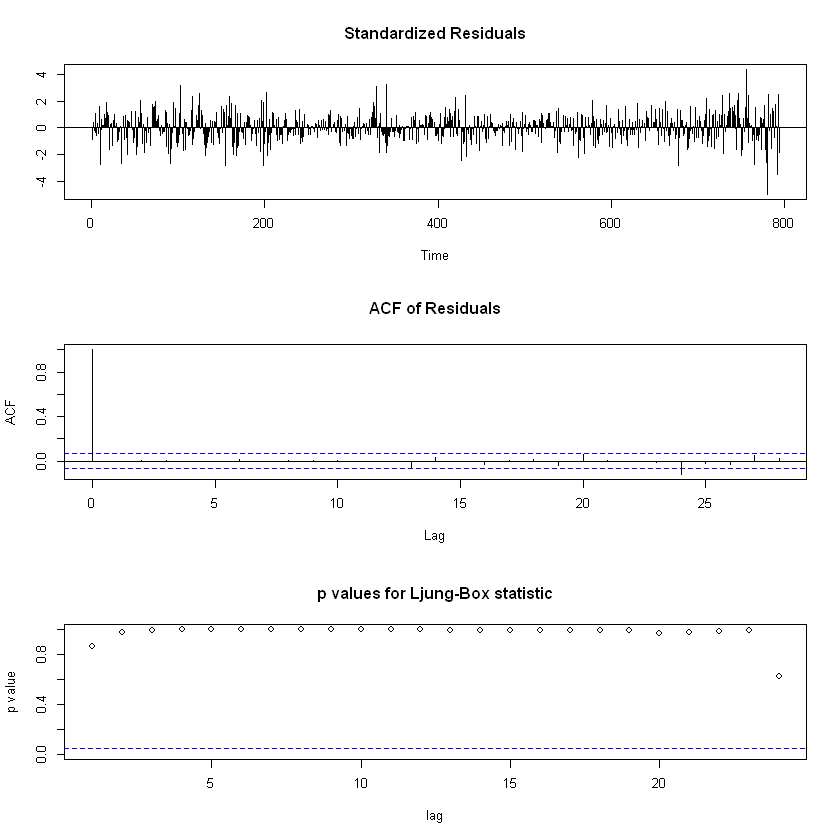

In [33]:
tsdiag(m3,gof=24)

The model explains much of the serial correlation. We do expect 5% of lags to be significant, so lag 24 being significant is not an issue. The model is adequate.

(iv)

In [34]:
m3


Call:
arima(x = rt, order = c(12, 0, 0), include.mean = F)

Coefficients:
          ar1     ar2     ar3     ar4     ar5     ar6     ar7      ar8     ar9
      -0.1351  0.1134  0.1083  0.1165  0.0738  0.0770  0.0903  -0.0609  0.0687
s.e.   0.0355  0.0358  0.0361  0.0363  0.0365  0.0366  0.0365   0.0366  0.0365
        ar10    ar11     ar12
      0.0609  0.0228  -0.0723
s.e.  0.0366  0.0364   0.0362

sigma^2 estimated as 0.2968:  log likelihood = -644.61,  aic = 1315.22

(v)

Seasonal Model

In [35]:
ms = arima(rt, order = c(2, 0, 1), seasonal =list(order = c(1, 0, 1), period = 12), include.mean = F)

In [36]:
ms


Call:
arima(x = rt, order = c(2, 0, 1), seasonal = list(order = c(1, 0, 1), period = 12), 
    include.mean = F)

Coefficients:
         ar1     ar2      ma1    sar1     sma1
      0.6538  0.2637  -0.8022  0.5662  -0.7429
s.e.  0.0478  0.0360   0.0382  0.0755   0.0585

sigma^2 estimated as 0.2926:  log likelihood = -639.43,  aic = 1290.85

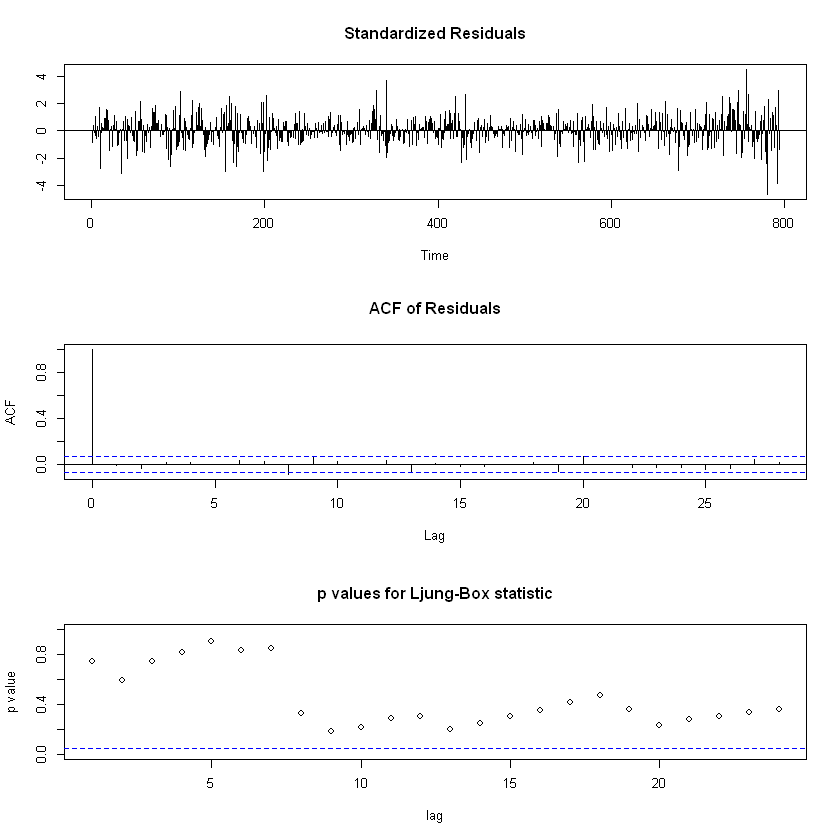

In [37]:
tsdiag(ms,gof=24)

This seasonal model is adequate. Much of the serial correlation is explained. Lag 8 is most likely significant due to sampling variation.

(vi)

The seasonal model had a better in-sample fit due to its AIC being lower than the AR(12) model.

(vii)

In [38]:
ms.bt = backtest(ms,rt,750,1)
m3.bt = backtest(m3,rt,750,1)

[1] "RMSE of out-of-sample forecasts"
[1] 0.9434657
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.7388721
[1] "RMSE of out-of-sample forecasts"
[1] 0.972803
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.7645786


The seasonal model performs better with out of sample forecast due to its RMSE and MAE being smaller.

Question 4

(i)

In [39]:
da4 = read.table("m-coilwtico.txt", header = TRUE)

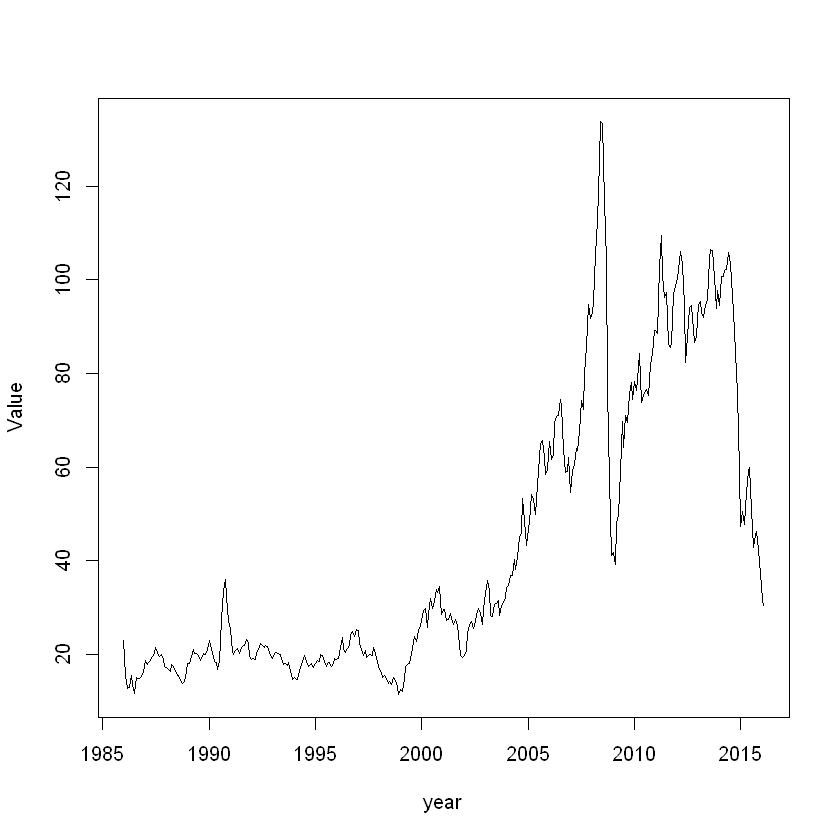

In [40]:
da4_ts = ts(da4$VALUE,frequency=12,start=c(1986,1))
plot(da4_ts,xlab='year',ylab='Value')

In [41]:
lgdiff = diff(log(da4$VALUE))

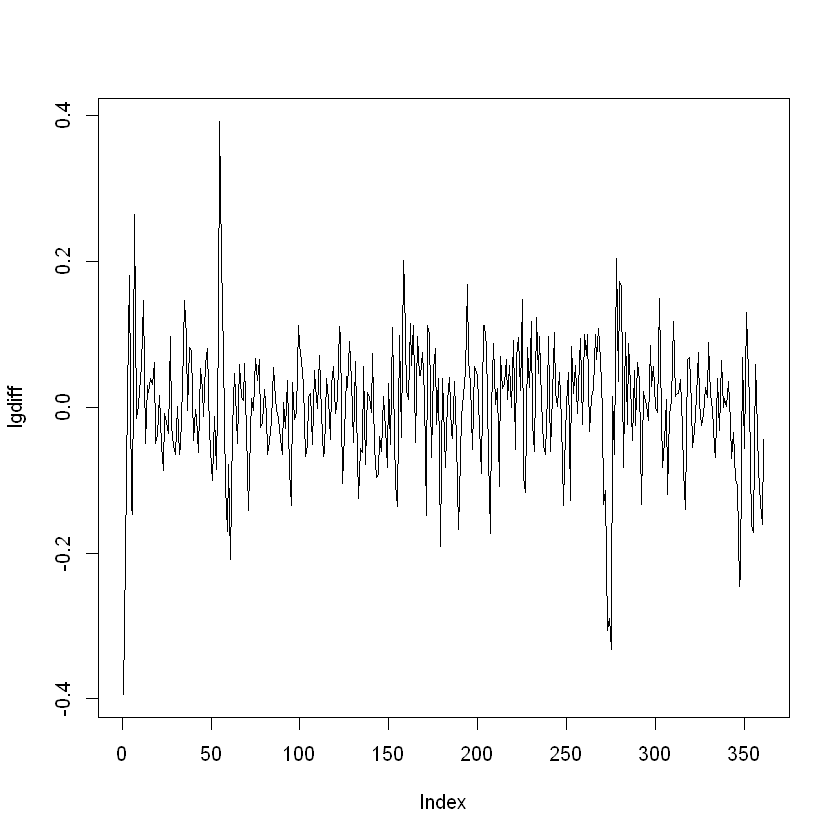

In [42]:
plot(lgdiff, type ="l")

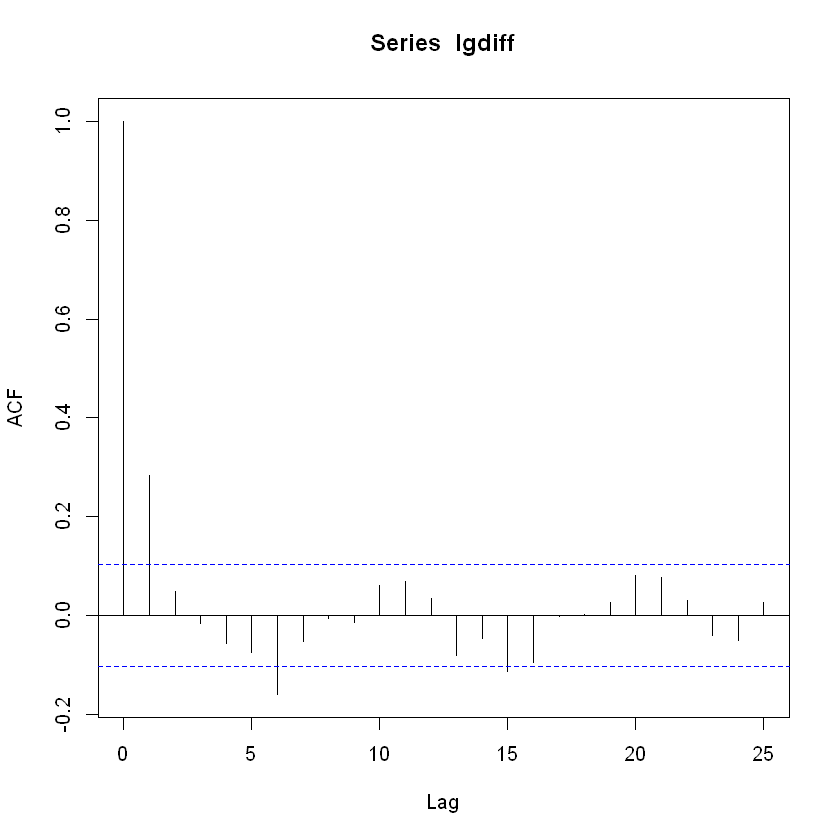

In [43]:
acf(lgdiff)

In [44]:
Box.test(lgdiff,lag=10,type='Ljung')


	Box-Ljung test

data:  lgdiff
X-squared = 45.355, df = 10, p-value = 1.877e-06


From the Box-Ljung test we reject the null hypothesis of no serial correlation. This model does not explain away the serial correlation. This can be seen in the acf where the second, sixth and fiftenth lag are significant.

(ii)

In [45]:
lgdiff.ar = ar(lgdiff, na.action=na.omit, method = 'mle')

In [46]:
lgdiff.ar$order

[1] 1

In [47]:
lgdiff.ar$ar

[1] 0.3001186

In [48]:
lgdiff.ar = arima(lgdiff, order = c(1, 0, 0), include.mean = F)

In [49]:
lgdiff.ar


Call:
arima(x = lgdiff, order = c(1, 0, 0), include.mean = F)

Coefficients:
         ar1
      0.3002
s.e.  0.0517

sigma^2 estimated as 0.007018:  log likelihood = 382.87,  aic = -761.74

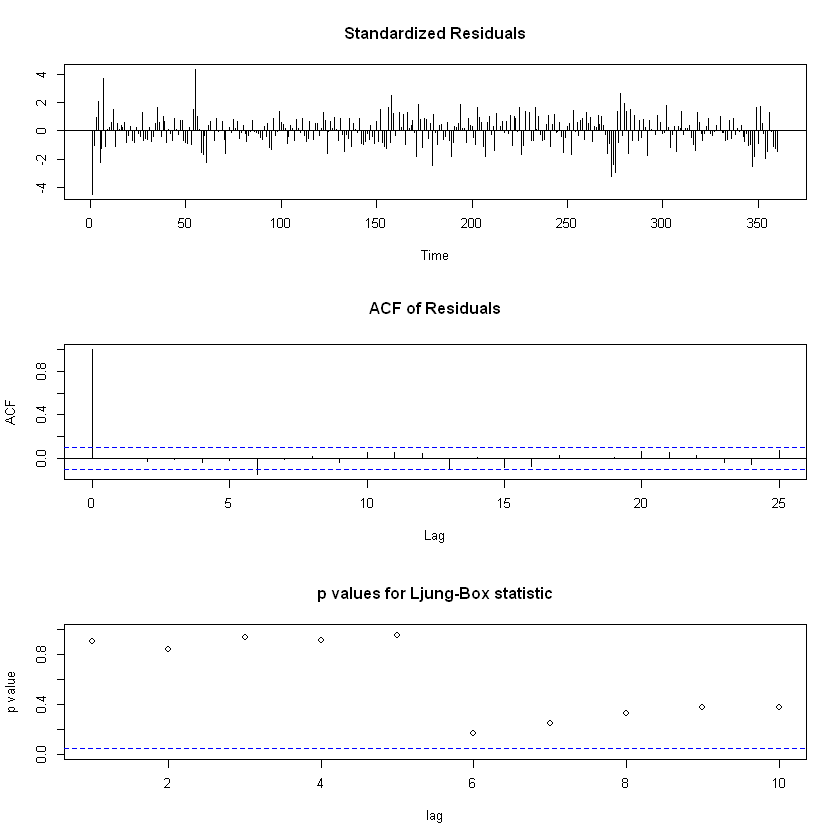

In [50]:
tsdiag(lgdiff.ar)

This model explains the serial correlation. The AR(1) has explained the serial correlation at lag 1. The only lag that is significant is lag 6. This likely does not mean anything and we expect 5% of lags to be significant anyway.

(iii)

In [51]:
m5 = arima(lgdiff, order = c(3, 0, 2), include.mean = F)

In [52]:
m5


Call:
arima(x = lgdiff, order = c(3, 0, 2), include.mean = F)

Coefficients:
         ar1      ar2     ar3      ma1     ma2
      0.5016  -1.0560  0.3105  -0.2022  0.9999
s.e.  0.0527   0.0117  0.0524   0.0133  0.0109

sigma^2 estimated as 0.006865:  log likelihood = 385.18,  aic = -758.37

Based on in-sample fitting the AR(1) model is preferred due to its AIC being smaller than the ARMA(3,2) AIC.

Question 5

(i)

In [53]:
da5 = read.table("m-PastorStambaugh.txt", header = TRUE)
da5

DATE,PS_LEVEL,PS_INNOV,PS_VWF
19620831,-0.017627253,0.004329826,-99
19620928,-0.004085483,0.013518034,-99
19621031,-0.104229891,-0.072595301,-99
19621130,-0.019620252,0.030973926,-99
19621231,-0.005288012,0.014779172,-99
19630131,-0.055790672,0.011711929,-99
19630228,0.014402543,0.027714666,-99
19630329,-0.023372166,-0.018708041,-99
19630430,0.054126597,0.079976796,-99
19630531,0.003541092,-0.011725728,-99


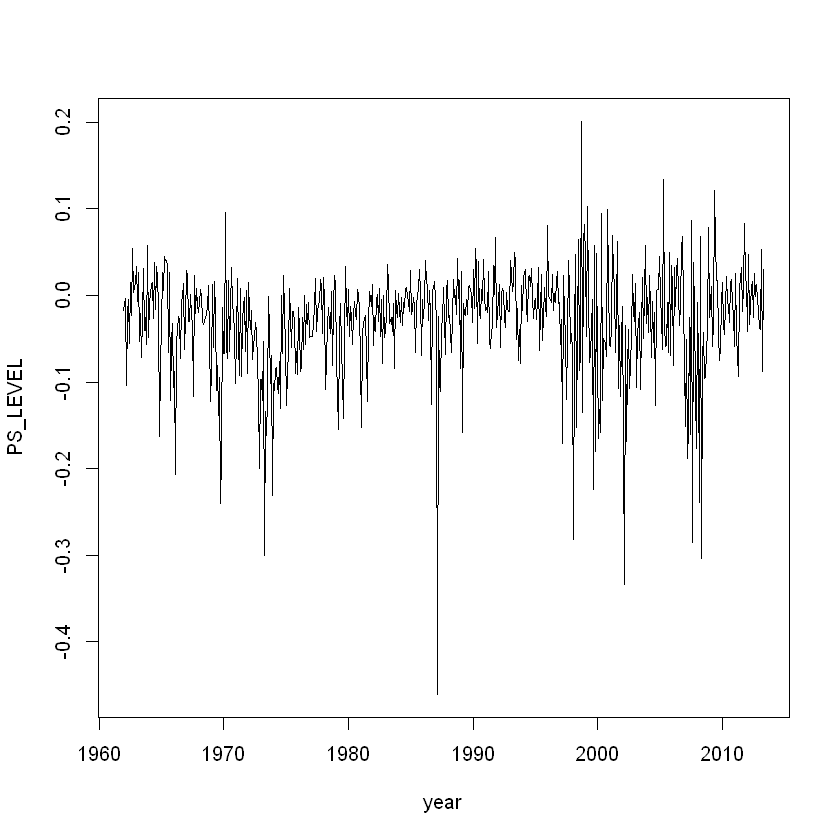

In [54]:
da5_ts = ts(da5$PS_LEVEL,frequency=12,start=c(1962,1))
plot(da5_ts,type='l',xlab='year',ylab='PS_LEVEL')

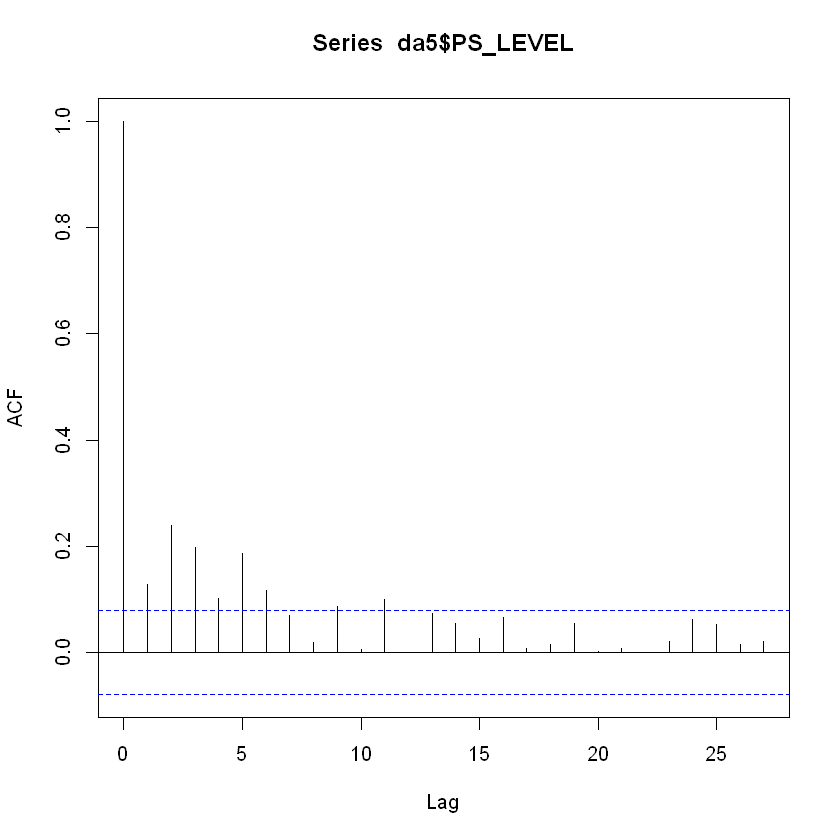

In [55]:
acf(da5$PS_LEVEL)

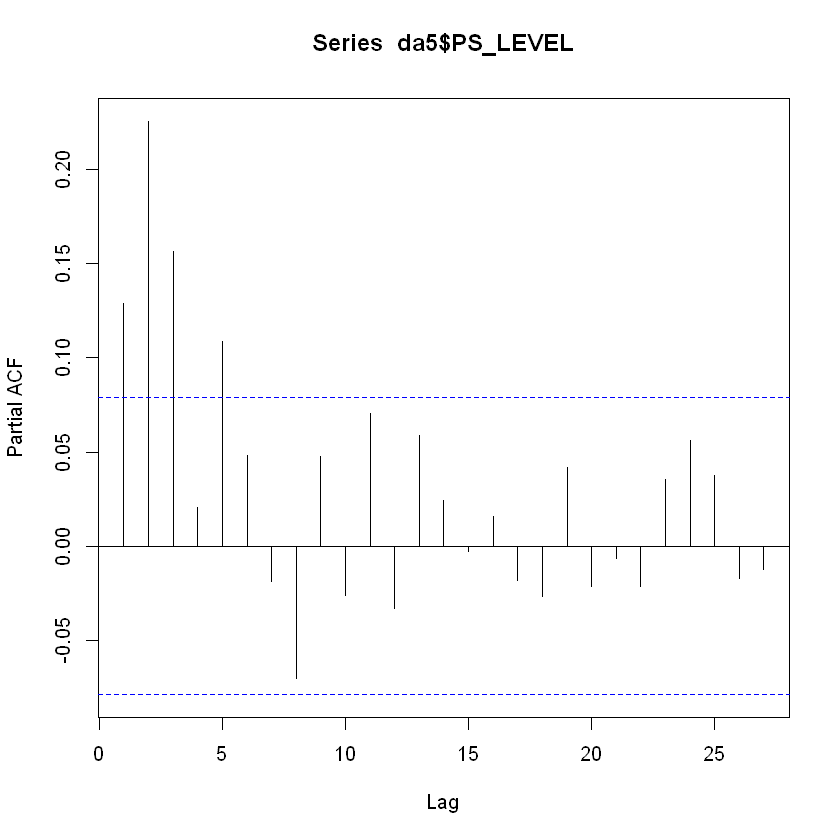

In [56]:
pacf(da5$PS_LEVEL)

(ii)

In [57]:
ps.ar = ar(da5$PS_LEVEL, na.action=na.omit, method = 'mle')

In [58]:
ps.ar$order

[1] 5

In [59]:
ps.ar$ar

[1] 0.05906233 0.18830520 0.13229369 0.01274182 0.10914458

In [60]:
ps.ar= arima(da5$PS_LEVEL,order = c(5,0,0))

In [61]:
ps.ar


Call:
arima(x = da5$PS_LEVEL, order = c(5, 0, 0))

Coefficients:
        ar1     ar2     ar3     ar4     ar5  intercept
      0.059  0.1883  0.1323  0.0127  0.1092    -0.0301
s.e.  0.040  0.0401  0.0405  0.0401  0.0400     0.0048

sigma^2 estimated as 0.003516:  log likelihood = 867.57,  aic = -1721.14

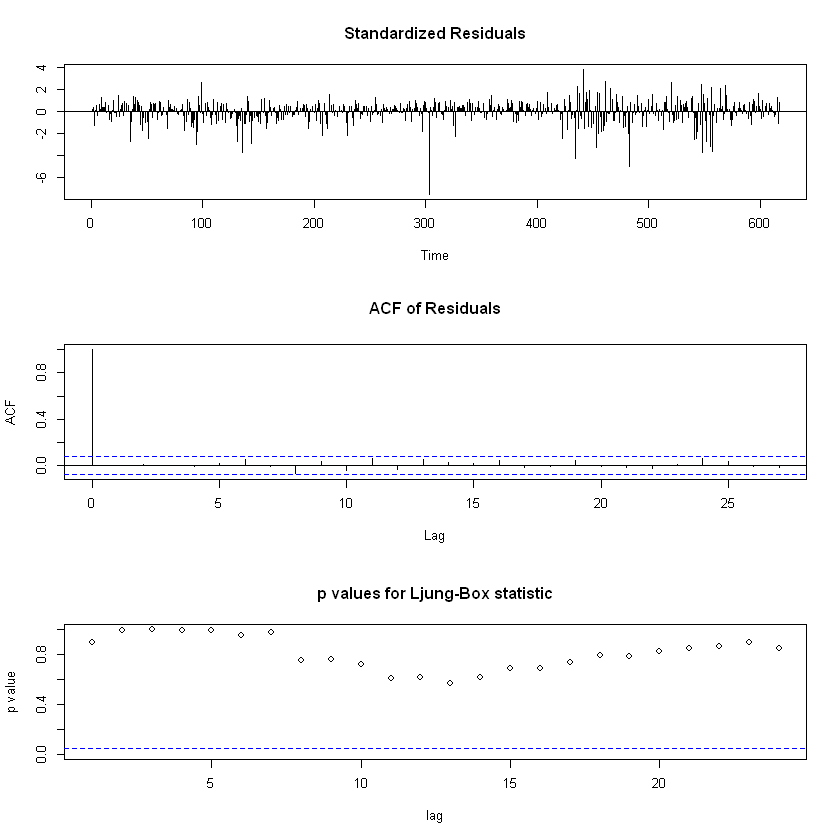

In [62]:
tsdiag(ps.ar, gof = 24)

Yes, this model is adequate based on acf and pvalues of Ljung-Box.

(iii)

Outlier

In [63]:
which.min(da5$PS_LEVEL)
min(da5$PS_LEVEL)

[1] 303

[1] -0.4610066

Create an indicator variable for Outlier

In [64]:
ind = rep(0,617)
ind[303] = 1

In [65]:
ps.ar = arima(da5$PS_LEVEL,order = c(5,0,0), xreg = ind)

In [66]:
ps.ar


Call:
arima(x = da5$PS_LEVEL, order = c(5, 0, 0), xreg = ind)

Coefficients:
         ar1    ar2     ar3     ar4     ar5  intercept      ind
      0.0618  0.191  0.1320  0.0185  0.1254    -0.0294  -0.4255
s.e.  0.0399  0.040  0.0405  0.0401  0.0400     0.0048   0.0547

sigma^2 estimated as 0.003202:  log likelihood = 896.4,  aic = -1776.79

(iv)

Based on the t-ratios, ar4 is the the least significant parameter.

min t-ratio: 0.461346633416459

In [67]:
ps.ar = arima(da5$PS_LEVEL,order = c(5,0,0), xreg = ind, fixed = c(NA,NA,NA,0,NA,NA,NA))

Warning message in arima(da5$PS_LEVEL, order = c(5, 0, 0), xreg = ind, fixed = c(NA, :
"some AR parameters were fixed: setting transform.pars = FALSE"

Revised model

In [68]:
ps.ar


Call:
arima(x = da5$PS_LEVEL, order = c(5, 0, 0), xreg = ind, fixed = c(NA, NA, NA, 
    0, NA, NA, NA))

Coefficients:
         ar1     ar2     ar3  ar4     ar5  intercept      ind
      0.0648  0.1948  0.1331    0  0.1266    -0.0295  -0.4247
s.e.  0.0394  0.0392  0.0405    0  0.0399     0.0047   0.0546

sigma^2 estimated as 0.003203:  log likelihood = 896.29,  aic = -1778.58

AIC for revised model is smaller than AR(5). Revised model has better in-sample fit.   

Question 6

(i)

In [69]:
da6 = read.table("q-earn-msft.txt", header = TRUE)

In [70]:
da6

yr,qr,value
1986,2,0.0015
1986,3,0.0020
1986,4,0.0024
1987,1,0.0022
1987,2,0.0027
1987,3,0.0044
1987,4,0.0046
1988,1,0.0038
1988,2,0.0045
1988,3,0.0058


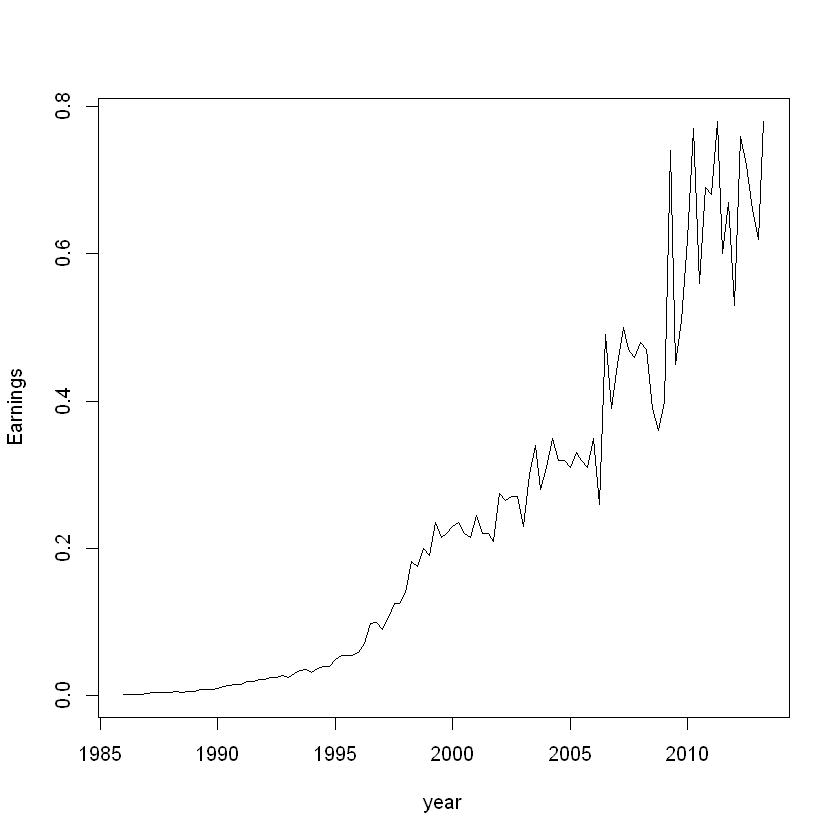

In [71]:
da6_ts = ts(da6$value,frequency=4,start=c(1986,1))
plot(da6_ts,type = "l",xlab='year',ylab='Earnings')

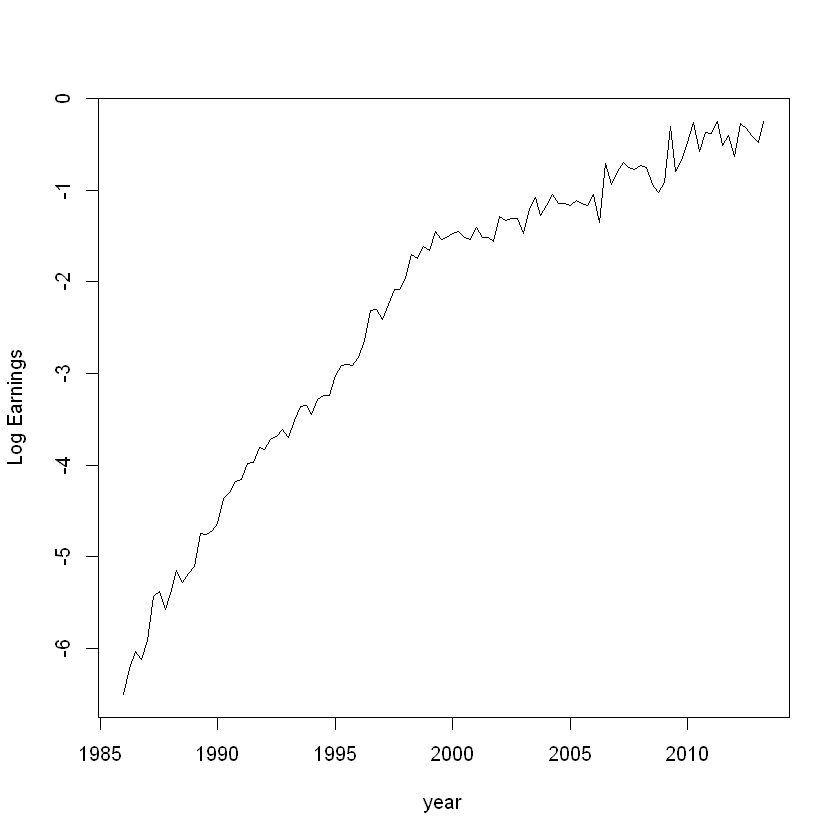

In [72]:
lg.rt = log(da6$value)
lg.rt_ts = ts(lg.rt,frequency=4,start=c(1986,1))
plot(lg.rt_ts,type = "l",xlab='year',ylab='Log Earnings')

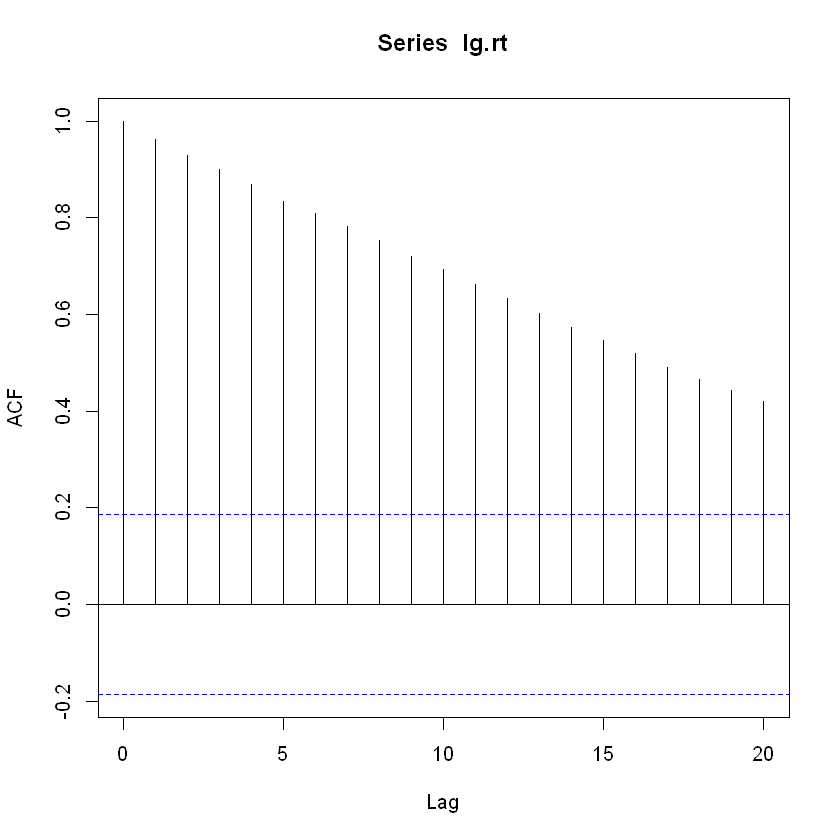

In [73]:
acf(lg.rt)

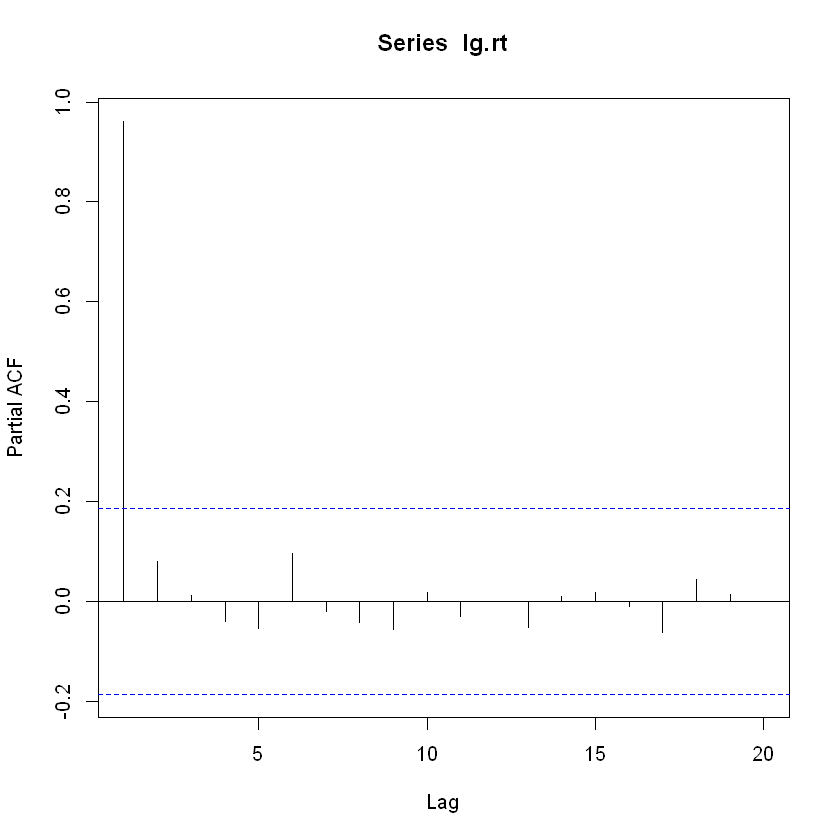

In [74]:
pacf(lg.rt)

In [75]:
lgrt.diff = diff(lg.rt)

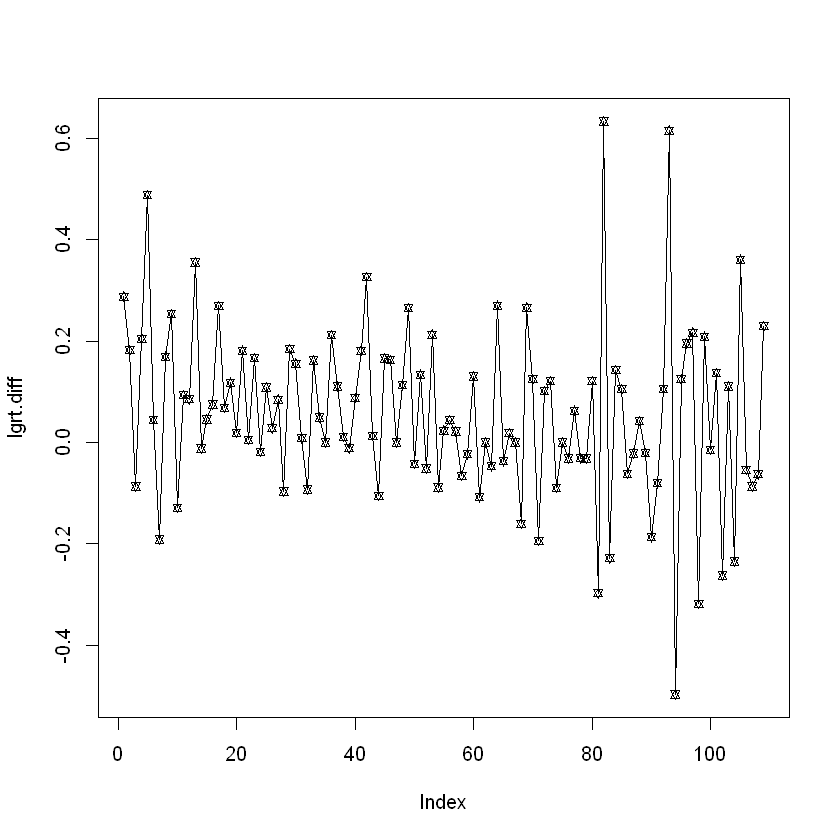

In [76]:
plot(lgrt.diff, type = "l")
points(lgrt.diff,pch=11,cex=0.7)

There looks to be a seasonal pattern.

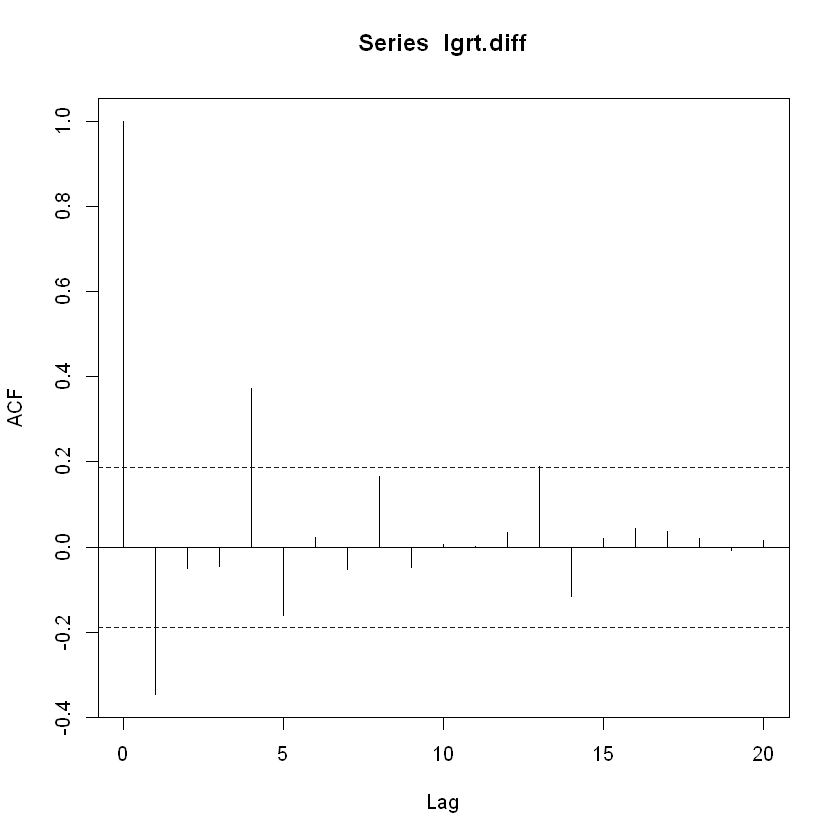

In [77]:
acf(lgrt.diff)

In [78]:
sdiff=diff(lg.rt,4)
dsdiff=diff(sdiff)

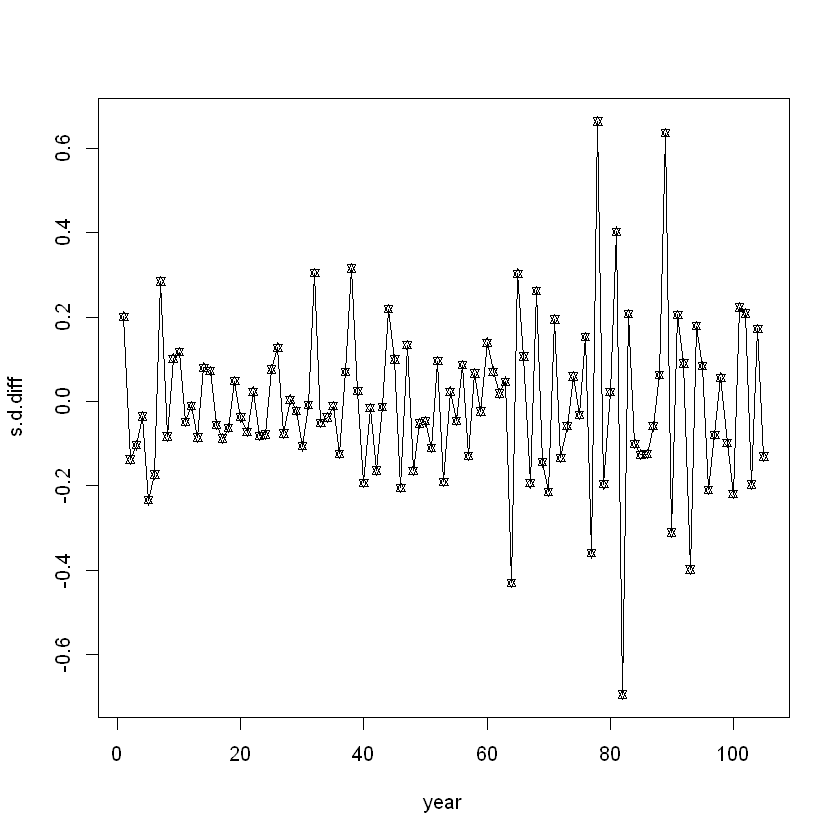

In [79]:
plot(dsdiff,xlab="year",ylab="s.d.diff",type="l")
points(dsdiff,pch=11,cex=0.7)

There is no serial correlation with the pacf, the acf shows some serial correlation with lag 1. Perhaps a seasonal MA(1) model will capture the serial correlation in the first lag. A seasonal pattern is also present. A seasonal difference model is resonable in this case.

In [80]:
m6 = arima(lg.rt,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4))

In [81]:
m6


Call:
arima(x = lg.rt, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.4826  -0.7149
s.e.   0.0809   0.0909

sigma^2 estimated as 0.02122:  log likelihood = 51.68,  aic = -97.37

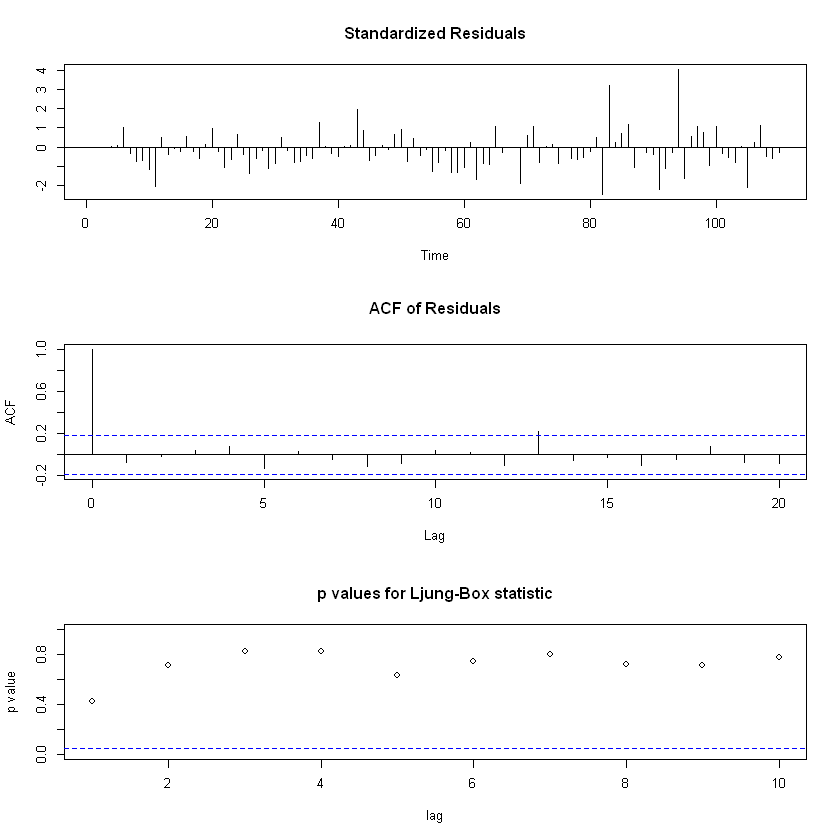

In [82]:
tsdiag(m6)

(ii)

In [83]:
m7 = arima(lg.rt ,order=c(0,1,1),seasonal=list(order=c(0,0,1),period=4))

In [84]:
m7


Call:
arima(x = lg.rt, order = c(0, 1, 1), seasonal = list(order = c(0, 0, 1), period = 4))

Coefficients:
          ma1    sma1
      -0.2723  0.3894
s.e.   0.0803  0.0762

sigma^2 estimated as 0.02565:  log likelihood = 44.62,  aic = -83.24

(iii)

m6 has better in-sample fit due to its AIC being lower than m7

(iv)

In [85]:
mm6 =backtest(m6,lg.rt,81,1)
mm7 = backtest(m7,lg.rt,81,1)

[1] "RMSE of out-of-sample forecasts"
[1] 0.2131425
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.1553725
[1] "RMSE of out-of-sample forecasts"
[1] 0.22943
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.1640435


M6 is preferred to out of sample forecast because both its MAE and RMSE are smaller than m7

Question 7

In [86]:
da7 = read.table("m-FamaBlissdbndyields.txt",header = TRUE)

(i)

In [87]:
da7

qdate,yield1,yield3
19610131,2.783,3.365
19610228,2.974,3.311
19610330,2.896,3.147
19610428,2.872,3.211
19610531,2.929,3.420
19610630,2.998,3.513
19610731,2.890,3.628
19610831,3.048,3.628
19610929,2.977,3.617
19611031,2.937,3.503


In [88]:
library(stargazer)


Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 



Create a linear model for 3 year bonds yeilds with 1 year bond yeilds as regressor

In [89]:
lm.fit = lm(da7$yield3 ~ da7$yield1, data = da7)

In [90]:
stargazer(lm.fit, type = "text")


                        Dependent variable:    
                    ---------------------------
                              yield3           
-----------------------------------------------
yield1                       0.941***          
                              (0.007)          
                                               
Constant                     0.713***          
                              (0.042)          
                                               
-----------------------------------------------
Observations                    636            
R2                             0.969           
Adjusted R2                    0.969           
Residual Std. Error      0.529 (df = 634)      
F Statistic         19,857.570*** (df = 1; 634)
Note:               *p<0.1; **p<0.05; ***p<0.01


R squared is .969. 

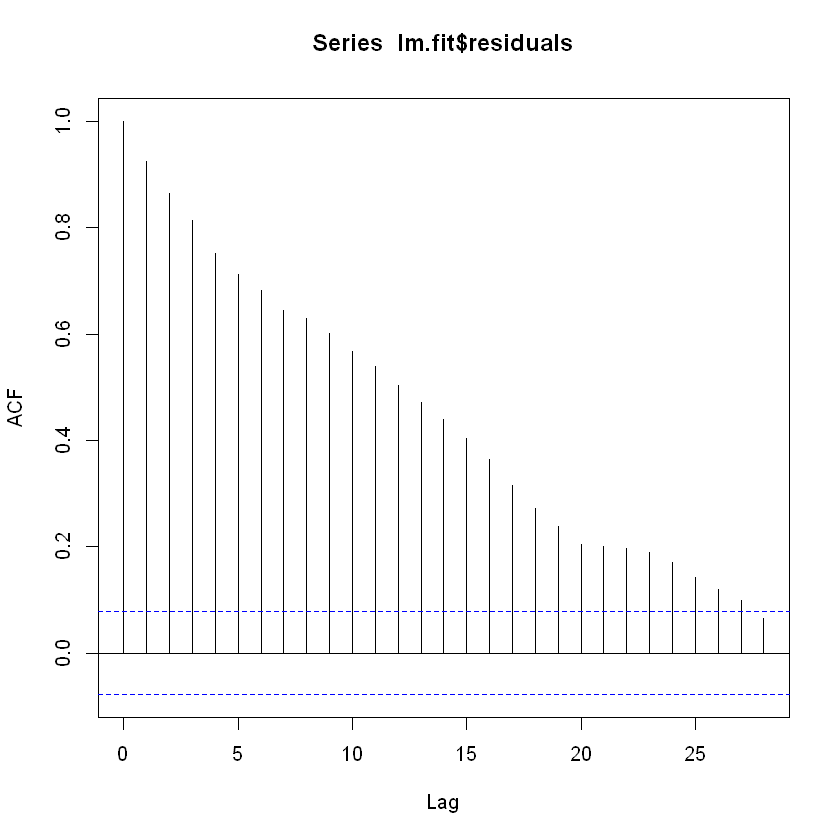

In [91]:
acf(lm.fit$residuals)

Much of the correlation in the residuals remains. This is likely due to using only one regressor, a more complex model is needed. The fit is not adequate.

(ii)

In [92]:
diff.y1 = diff(da7$yield1)
diff.y3 = diff(da7$yield3)

In [93]:
lm.fit1 = lm(diff.y3 ~ diff.y1)
stargazer(lm.fit1, type = "text")


                        Dependent variable:    
                    ---------------------------
                              diff.y3          
-----------------------------------------------
diff.y1                      0.736***          
                              (0.015)          
                                               
Constant                      -0.001           
                              (0.007)          
                                               
-----------------------------------------------
Observations                    635            
R2                             0.796           
Adjusted R2                    0.796           
Residual Std. Error      0.180 (df = 633)      
F Statistic         2,474.088*** (df = 1; 633) 
Note:               *p<0.1; **p<0.05; ***p<0.01


R squared is .796

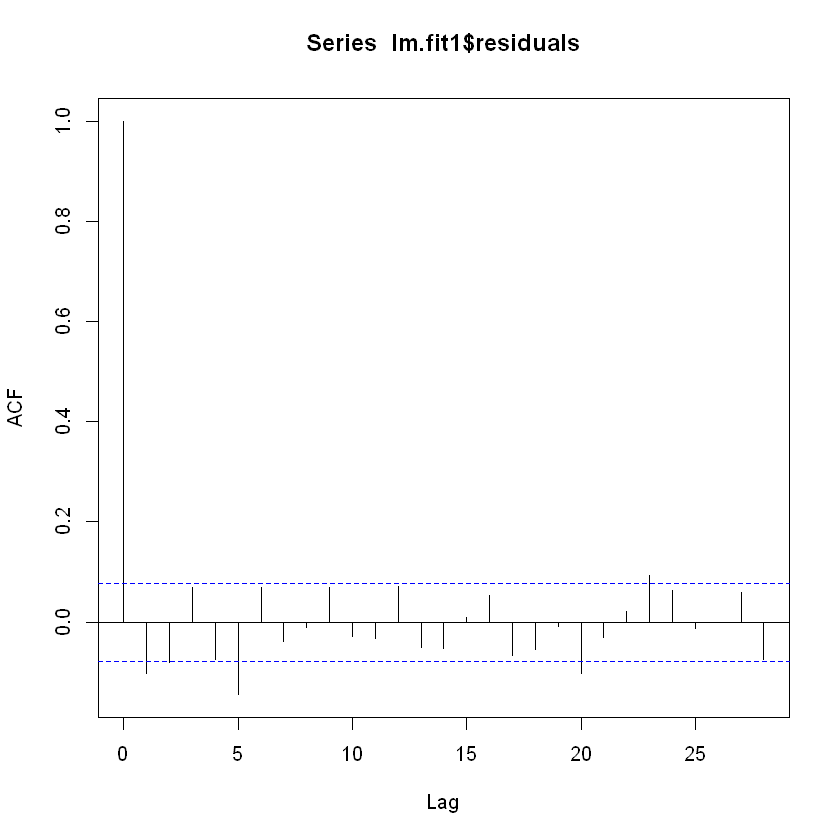

In [94]:
acf(lm.fit1$residuals)

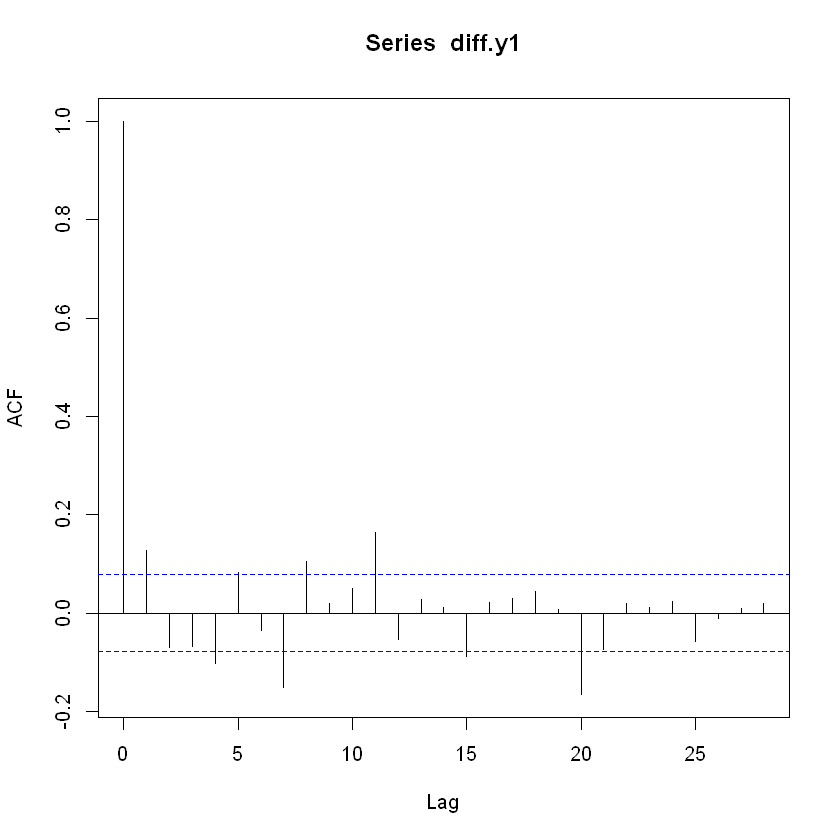

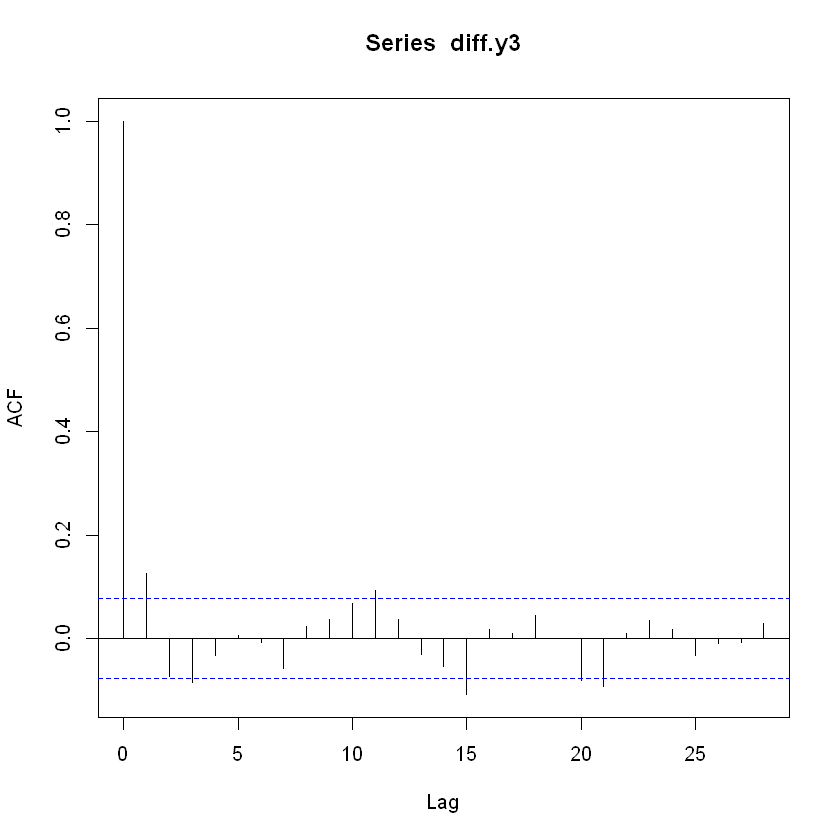

In [95]:
acf(diff.y1)
acf(diff.y3)

The first difference explains more of the serial correlation. There is still some serial coreelation present.

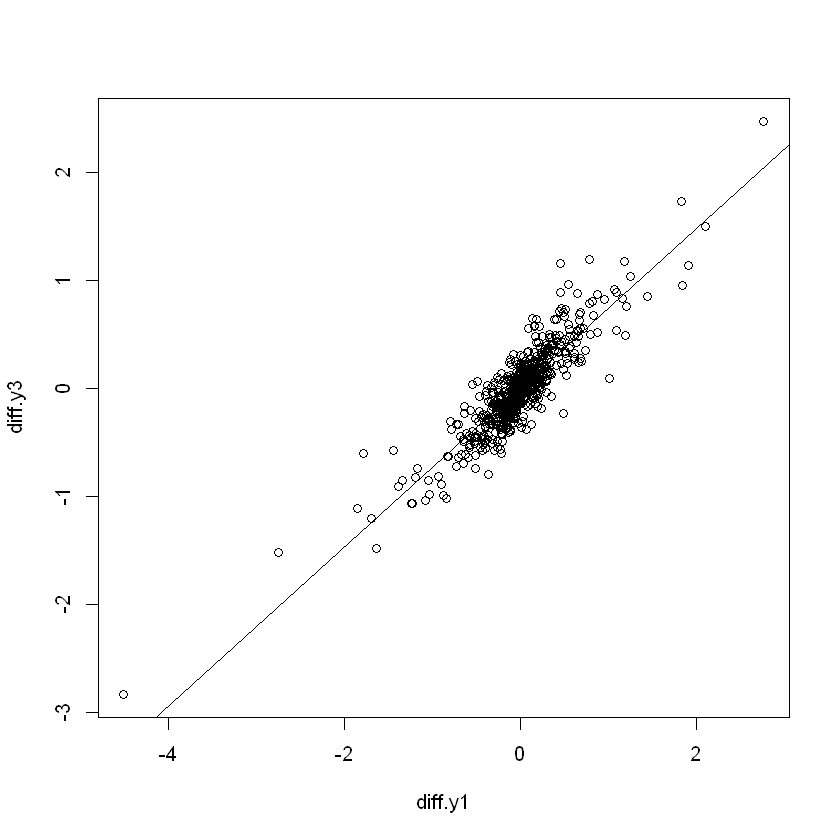

In [96]:
plot(diff.y1,diff.y3)
abline(lm.fit1)

In [97]:
diff4 = diff(da7$yield1,4)

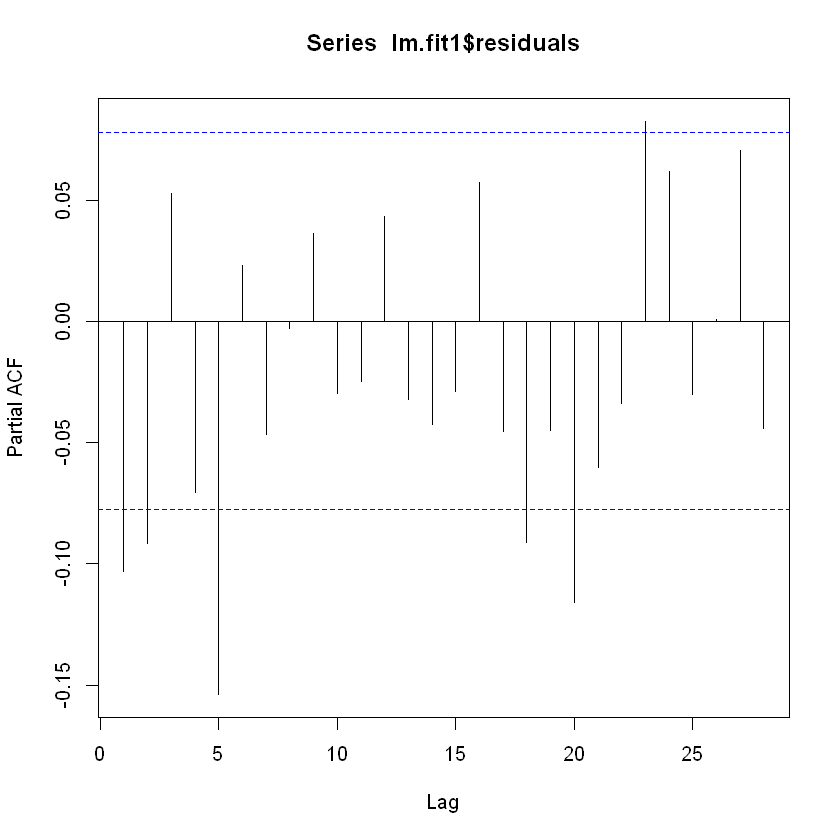

In [98]:
pacf(lm.fit1$residuals)

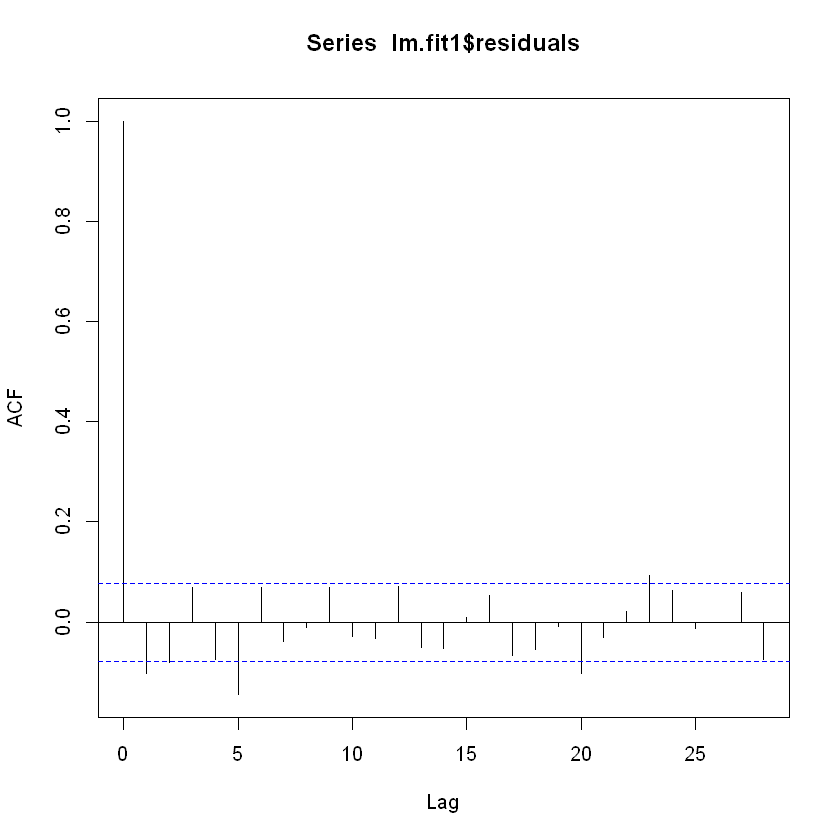

In [99]:
acf(lm.fit1$residuals)

(iii)

Model is not adequate. There is still serial correlation

Serial correlation from the first five lags is present.

In [100]:
m8 =  arima(diff.y3,order = c(5, 0 ,5), xreg = diff.y1)
m9 = arima(diff.y3,order = c(5, 0 ,5), xreg = diff.y1,fixed= c(NA,0,0,0,0,NA,NA,0,0,NA,NA,NA))

Warning message in arima(diff.y3, order = c(5, 0, 5), xreg = diff.y1, fixed = c(NA, :
"some AR parameters were fixed: setting transform.pars = FALSE"

In [101]:
m8
m9

Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"


Call:
arima(x = diff.y3, order = c(5, 0, 5), xreg = diff.y1)

Coefficients:
          ar1      ar2     ar3      ar4      ar5     ma1      ma2      ma3
      -0.1673  -0.0146  0.2048  -0.2310  -0.0864  0.0537  -0.0804  -0.1752
s.e.   0.0627      NaN  0.2116   0.2871      NaN  0.0899      NaN   0.2368
         ma4      ma5  intercept  diff.y1
      0.1785  -0.0843    -0.0010   0.7442
s.e.  0.2736      NaN     0.0048   0.0059

sigma^2 estimated as 0.03068:  log likelihood = 205.06,  aic = -384.12


Call:
arima(x = diff.y3, order = c(5, 0, 5), xreg = diff.y1, fixed = c(NA, 0, 0, 0, 
    0, NA, NA, 0, 0, NA, NA, NA))

Coefficients:
          ar1  ar2  ar3  ar4  ar5     ma1      ma2  ma3  ma4      ma5
      -0.3494    0    0    0    0  0.2342  -0.1285    0    0  -0.1545
s.e.   0.1864    0    0    0    0  0.1849   0.0458    0    0   0.0403
      intercept  diff.y1
        -0.0010   0.7422
s.e.     0.0049   0.0143

sigma^2 estimated as 0.03096:  log likelihood = 202.21,  aic = -390.42

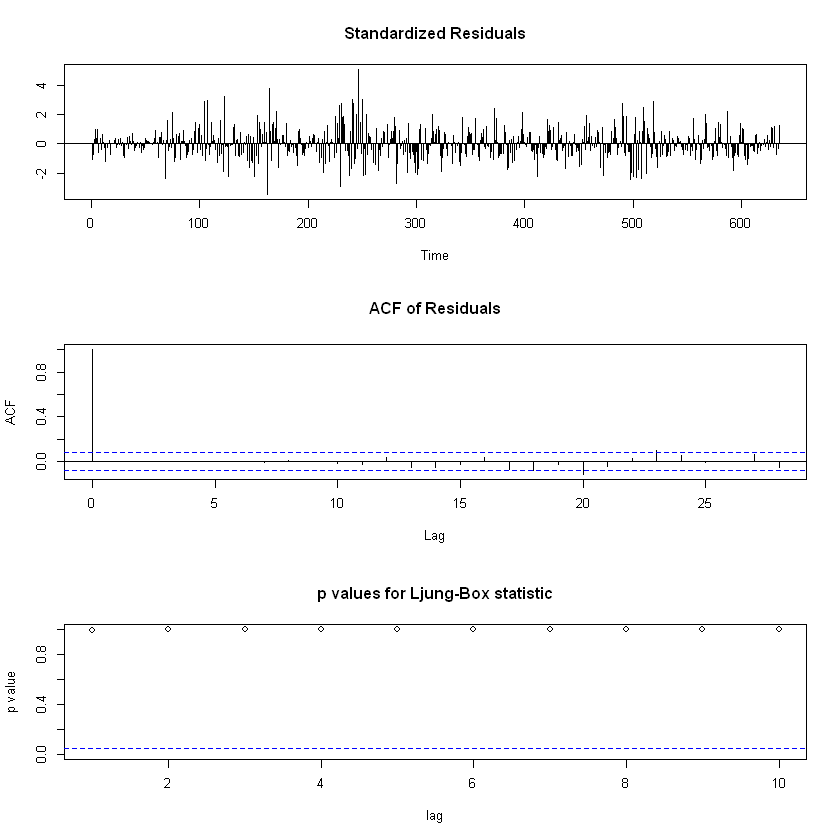

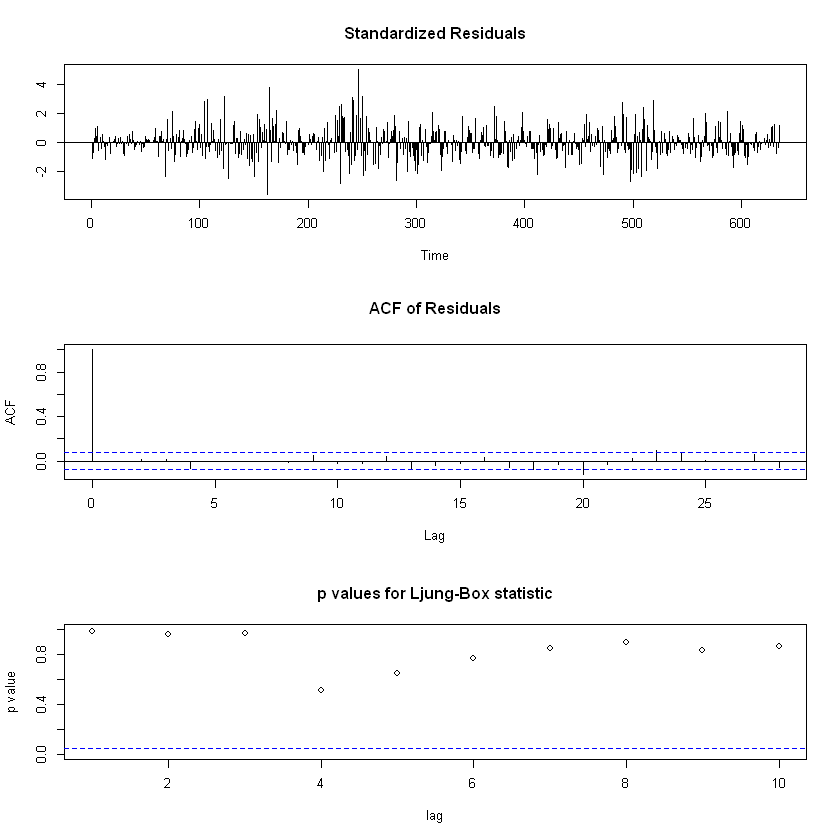

In [102]:
tsdiag(m8)
tsdiag(m9)

(v)

In [103]:
m9 = arima(da7$yield3,order = c(6,0,0),xreg = da7$yield1)
m9


Call:
arima(x = da7$yield3, order = c(6, 0, 0), xreg = da7$yield1)

Coefficients:
         ar1     ar2     ar3      ar4      ar5     ar6  intercept  da7$yield1
      0.8744  0.0329  0.1175  -0.1243  -0.0635  0.1457     1.6424      0.7469
s.e.  0.0395  0.0525  0.0522   0.0527   0.0529  0.0394     0.3652      0.0144

sigma^2 estimated as 0.03063:  log likelihood = 204.46,  aic = -390.92

(vi)

In [104]:
m10 = arima(da7$yield3,order = c(6,0,0),xreg = da7$yield1, fixed = c(NA,0,NA,NA,0,NA,NA,NA))
m10

Warning message in arima(da7$yield3, order = c(6, 0, 0), xreg = da7$yield1, fixed = c(NA, :
"some AR parameters were fixed: setting transform.pars = FALSE"


Call:
arima(x = da7$yield3, order = c(6, 0, 0), xreg = da7$yield1, fixed = c(NA, 0, 
    NA, NA, 0, NA, NA, NA))

Coefficients:
         ar1  ar2     ar3      ar4  ar5     ar6  intercept  da7$yield1
      0.8904    0  0.1332  -0.1553    0  0.1142     1.6336      0.7486
s.e.  0.0295    0  0.0458   0.0458    0  0.0295     0.3622      0.0143

sigma^2 estimated as 0.03071:  log likelihood = 203.63,  aic = -393.25

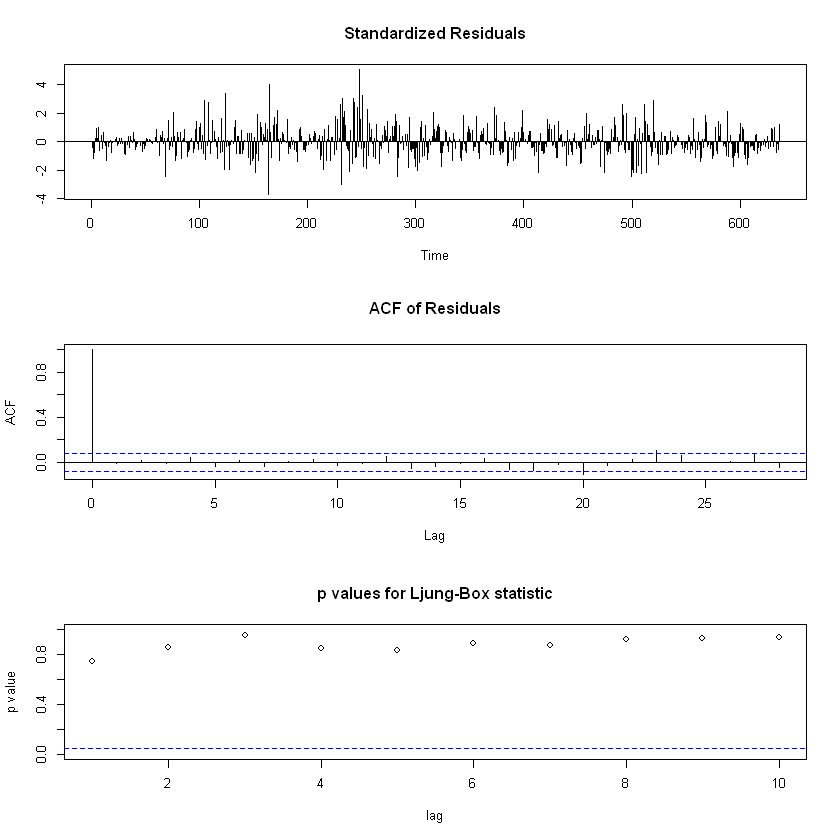

In [105]:
tsdiag(m10)

(vii)

Refined model captures serial correlation. No serial correlation in the residuals.

Question 8

(i)

In [106]:
da8 = read.table("d-msft3dx0113.txt", header = TRUE)

In [107]:
da8

PERMNO,date,msft,vwretd,ewretd,sprtrn
10107,20010103,0.105187,0.052945,0.046221,0.050099
10107,20010104,0.010430,-0.011796,0.011364,-0.010552
10107,20010105,0.014194,-0.028857,-0.008607,-0.026242
10107,20010108,-0.003817,-0.003433,-0.005051,-0.001918
10107,20010109,0.058748,0.004889,0.011808,0.003812
10107,20010110,0.020507,0.013824,0.020657,0.009586
10107,20010111,0.040189,0.014959,0.027183,0.010318
10107,20010112,-0.027273,-0.003536,0.019473,-0.006406
10107,20010116,-0.017523,0.006230,0.019410,0.006319
10107,20010117,0.007134,0.004503,0.012757,0.002126


In [108]:
lg_rt = log(da8$msft + 1)

In [109]:
t.test(lg_rt)


	One Sample t-test

data:  lg_rt
t = 0.78265, df = 3267, p-value = 0.4339
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0003912310  0.0009110703
sample estimates:
   mean of x 
0.0002599197 


Based on t-test log returns have an expected value of 0.

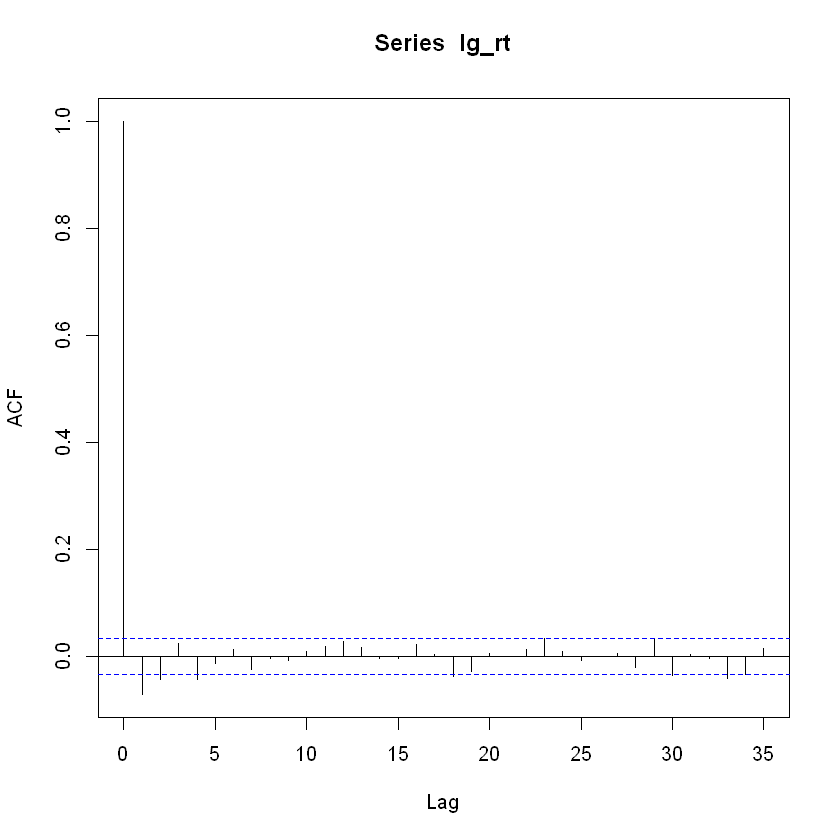

In [110]:
acf(lg_rt)

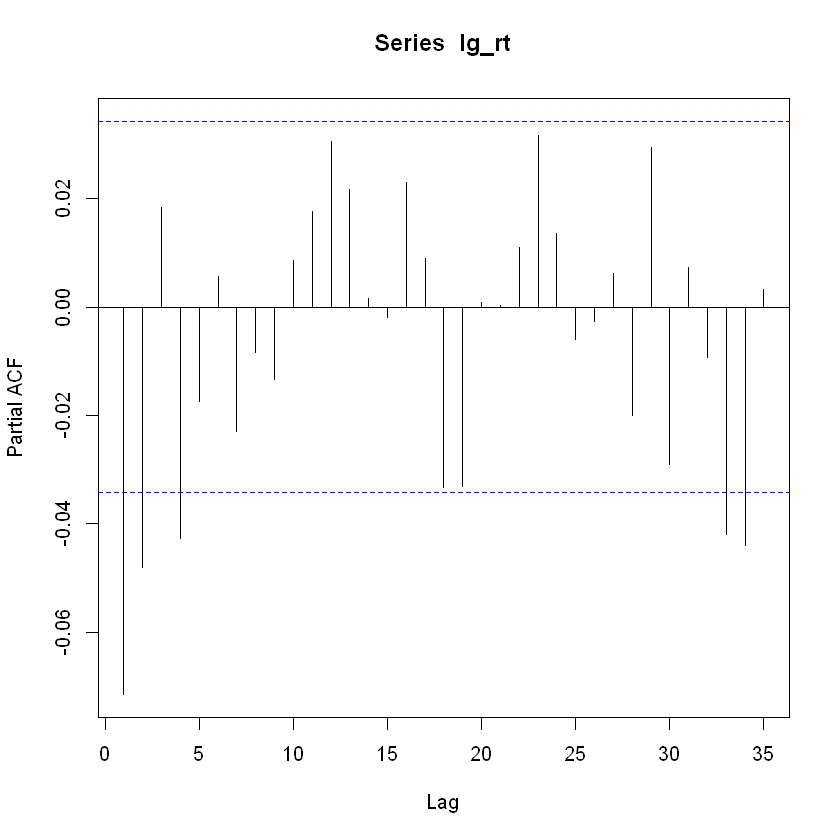

In [111]:
pacf(lg_rt)

There is serial correlation

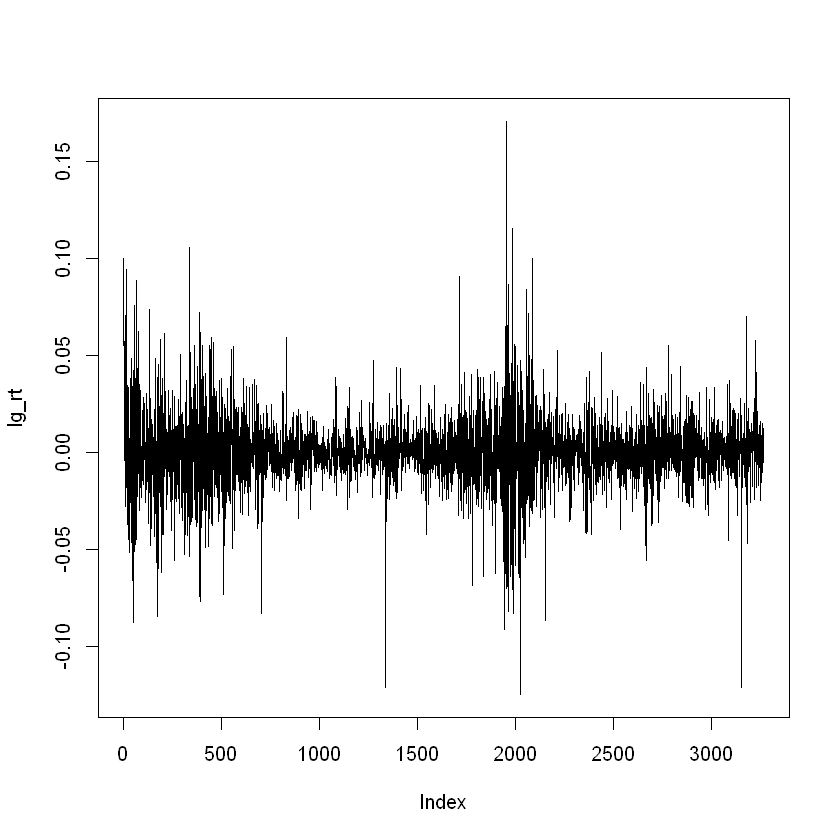

In [112]:
plot(lg_rt,type = "l")

The serial correlation may be due to the changing volatility 

In [113]:
Box.test(lg_rt,lag=24,type='Ljung')


	Box-Ljung test

data:  lg_rt
X-squared = 52.571, df = 24, p-value = 0.0006588


The Box-Ljung test confirms that there is serial correlation. We reject null hypothesis of no serial correlation

(ii)

In [114]:
m11 = arima(lg_rt,order = c(2,0,2), include.mean = F)
m11


Call:
arima(x = lg_rt, order = c(2, 0, 2), include.mean = F)

Coefficients:
          ar1      ar2     ma1     ma2
      -0.6146  -0.2354  0.5419  0.1538
s.e.   0.2896   0.3369  0.2951  0.3404

sigma^2 estimated as 0.0003574:  log likelihood = 8331.52,  aic = -16653.05

In [115]:
Box.test(m11$residuals,lag=24,type='Ljung')


	Box-Ljung test

data:  m11$residuals
X-squared = 28.784, df = 24, p-value = 0.2284


In [116]:
Box.test(m11$residuals^2,lag=24,type='Ljung')


	Box-Ljung test

data:  m11$residuals^2
X-squared = 1020.6, df = 24, p-value < 2.2e-16


There is no serial correlation in residuals, but there is correlation in squared residuals. Indicating arch effects.

(iii)

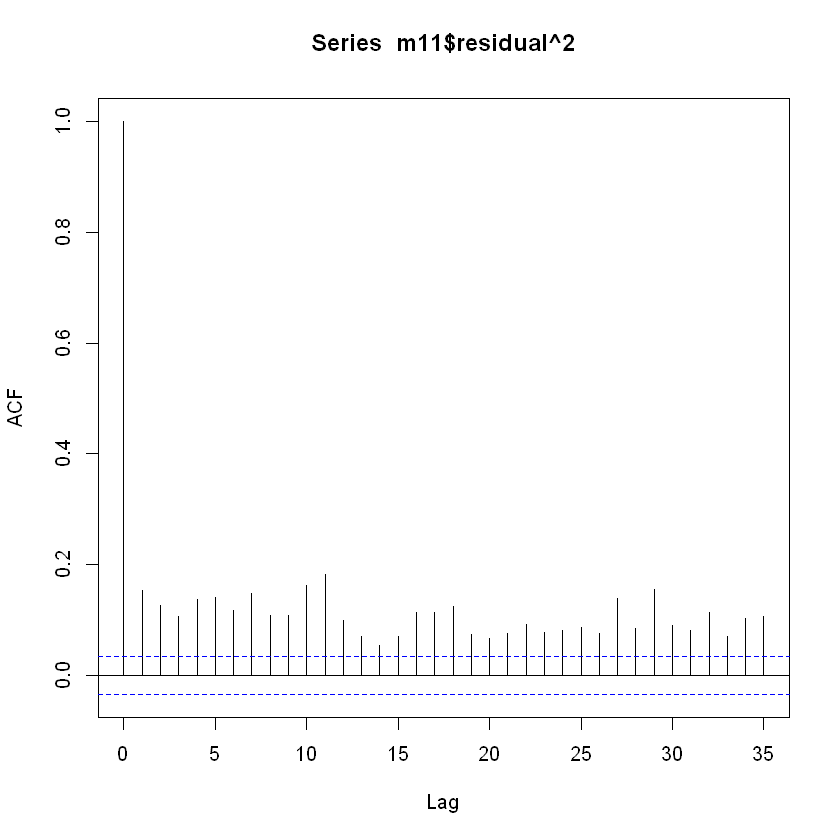

In [117]:
acf(m11$residual^2)

Adding simplist garch

In [118]:
library(fGarch)

Warning message:
"package 'fGarch' was built under R version 3.3.3"Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


In [119]:
m12=garchFit(~arma(2,2)+garch(1,1),data=lg_rt,trace=F)

Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"

In [120]:
summary(m12)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(2, 2) + garch(1, 1), data = lg_rt, trace = F) 

Mean and Variance Equation:
 data ~ arma(2, 2) + garch(1, 1)
<environment: 0x000000002023f890>
 [data = lg_rt]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ar2          ma1          ma2        omega  
 4.5496e-05   6.4560e-01   2.2937e-01  -6.8995e-01  -2.0184e-01   4.4300e-06  
     alpha1        beta1  
 5.2595e-02   9.3369e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      4.550e-05   4.947e-05    0.920   0.3577    
ar1     6.456e-01   2.911e-01    2.218   0.0266 *  
ar2     2.294e-01   1.997e-01    1.148   0.2508    
ma1    -6.899e-01   2.947e-01   -2.341   0.0192 *  
ma2    -2.018e-01   2.140e-01   -0.943   0.3455    
omega   4.430e-06   1.122e-06    3.947 7.91e-05 ***
alpha1  5.260e-02   9.773e-03    5.382 7.38e-08 ***
beta1   9.337e-01   1.222e-02   76.387  < 2e-16 ***
-

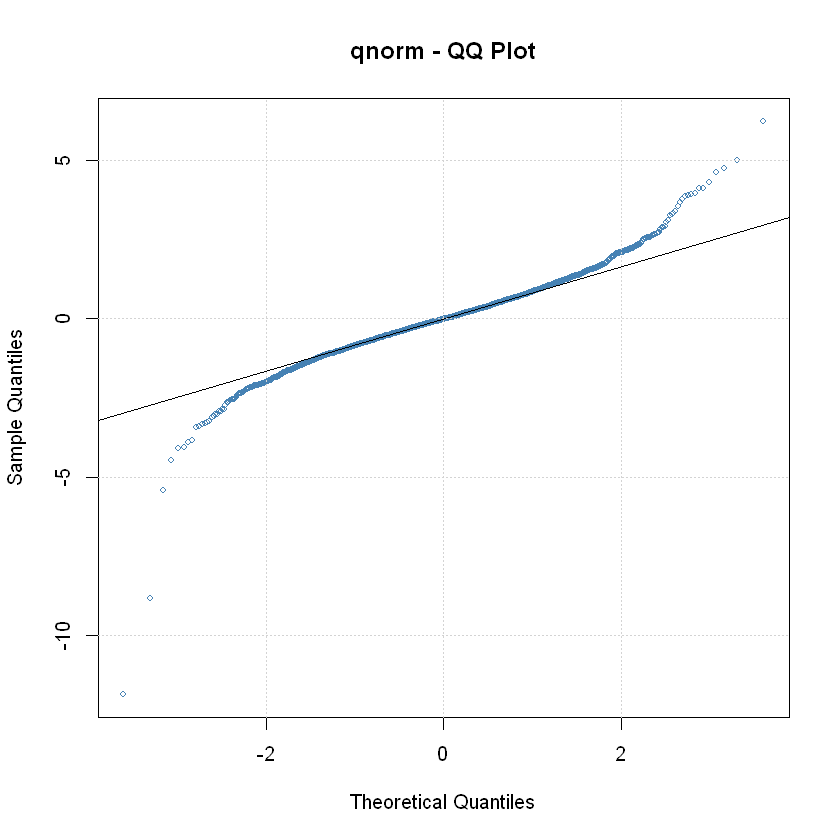

In [121]:
plot(m12,which=13)

Normality is violated, but all other tests show model fit is adequate.

(iv)

In [122]:
m12=garchFit(~arma(2,2)+garch(1,1),data=lg_rt,trace=F, cond.dist= "std")

Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"

In [123]:
summary(m12)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(2, 2) + garch(1, 1), data = lg_rt, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(2, 2) + garch(1, 1)
<environment: 0x00000000206ac800>
 [data = lg_rt]

Conditional Distribution:
 std 

Coefficient(s):
         mu          ar1          ar2          ma1          ma2        omega  
 3.4830e-04  -7.0910e-01   2.1404e-01   6.6853e-01  -2.5563e-01   1.5773e-06  
     alpha1        beta1        shape  
 5.6331e-02   9.4115e-01   4.8014e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      3.483e-04   3.139e-04    1.110  0.26717    
ar1    -7.091e-01   1.371e-01   -5.172 2.32e-07 ***
ar2     2.140e-01   1.029e-01    2.081  0.03747 *  
ma1     6.685e-01   1.351e-01    4.948 7.49e-07 ***
ma2    -2.556e-01   1.012e-01   -2.526  0.01153 *  
omega   1.577e-06   6.086e-07    2.592  0.00955 ** 
alpha1  5.633e-02   9.839e-03    5.725 1.03e-08 ***
beta

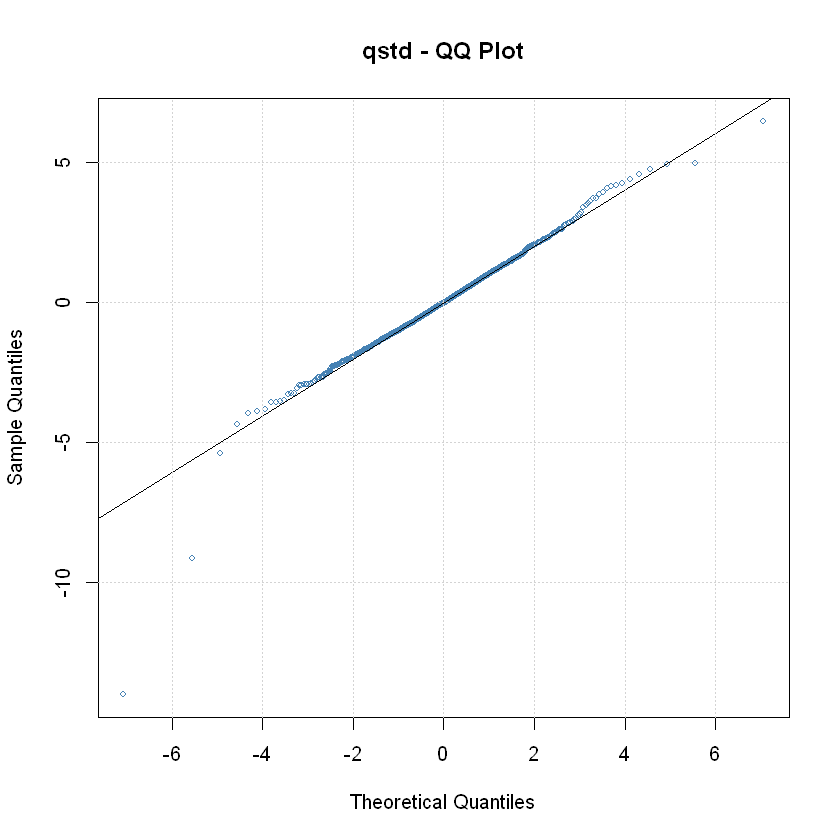

In [124]:
plot(m12,which=13)

Model is closer to t distirbution

(v)

In [125]:
predict(m12,1)
predict(m12,5)

meanForecast,meanError,standardDeviation
0.0002366463,0.01223968,0.01223968


Warning message in a_vec[i] <- ar[1:min(u2, i - 1)] * a_vec[(i - 1):(i - u2)] + :
"number of items to replace is not a multiple of replacement length"Warning message in a_vec[i] <- ar[1:min(u2, i - 1)] * a_vec[(i - 1):(i - u2)] + :
"number of items to replace is not a multiple of replacement length"

meanForecast,meanError,standardDeviation
2.366463e-04,0.01223968,0.01223968
7.906508e-05,0.01229865,0.01228862
3.428853e-04,0.01234831,0.01233725
1.220831e-04,0.01239717,0.01238556
3.351203e-04,0.01244547,0.01243356
